# Анализ и визуализация целей обучения студентов "Яндекс Практикум"


---

## Проект был выполнен командой **Seven strangers**

**Участники команды:**

Дарья Саничева PM

Ирина Тетерева (Аналитик) \
Александр Трудолюбов (Аналитик) \
Карасева Алина (Аналитик)

Анастасия (дизайнер) \
Вероника (дизайнер) \
Анастасия (дизайнер)





**Краткое описание исследования:**

**Цель проекта:** используя данные, полученные с помощью опроса студентов Яндекс Практикума, определить цели студентов Яндекс Практикума и выстроить факторы, которые будут способствовать помощи студентам в достижении этих целей

**Задачи проекта:**
1. Предобработать данные, определить нормальные и найти аномальные показатели
2. Определить основные цели студентов практикума. (этот пункт может быть после портретов и сегментаций)
2. Построить портреты студентов, сравнить их, чтобы выделить значимые закономерности
Сегментировать студентов (по 2м и более показателям), выявить
особенности сегментов
4. Сформулировать на основе данных гипотезы по улучшению
выстраивания помощи студентам в достижении их целей
5. Oформить выводы и гипотезы для презентации руководству Яндекс Практикума.

<br>
<br>

**Описание дата-сета:**

data_goals_answers
* `question_title` — текст вопроса
* `question_type` — тип вопроса
* `user_id` — уникальный id пользователя
* `user_answer` — ответ пользователя на вопрос
* `answer_date` — время ответа
* `answer_id` — id ответа
* `cohort`, `current_cohort` — начальная и текущая когорта студента
* `course_name`, `topic_name`, `lesson_name` — курс, тема и урок, на котором студент отвечает на вопрос
   У нас значения должны быть Трудоустройство-Трудоустройство-Цель обучения, т.к. мы изучаем именно это
* `original_segment`, `current_segment` — b2c/b2b/b2g — из какого сегмента был/стал студент — сам является клиентом, его обучение оплачивается бизнесом или государством
* `profession_name` — код профессии
* `statement_content` — формулировка вопроса об уверенности в знаниях (в этой таблице нету)
* `slide_position` — страница опроса (не нужно для анализа)

hackathon_metrics
* `profession_name` — код профессии
* `user_id` — уникальный id пользователя
* `lp_avg_user` — средний learning performance 
   Первые, более высокие значения в таблице с фри-трека, последние с курса, наиболее актуально находящееся в таблице ниже
* `question_title` — текст вопроса
* `user_answer` — ответ пользователя на вопрос
* `statement_content` — формулировка вопроса об уверенности в знаниях 
* `value` — ответ на вопрос об уверенности в знаниях для расчёта learning experience индекса
<br>
<br>


**Ключевые выводы:**
Должен быть разный подход к построению работы с группами студентов на карьерном треке.
Группа новички, которые ищут работу активно - нужна помощь с оформлением артефактов, предоставление шаблонов резюме, сопроводительного письма, портфолио, и может быть ДЗ типа "запиши видеопрезентацию "Расскажите о себе". Проведение "тестовых собеседований"
Группа профессионалы, которые улучшить навыки - нужен коучинговый подход, работа в индивидуальном формате, персональная оценка навыков, может какое-то тестирование, составление плана развития.

**Оглавление:**


- Подготовка к анализу данных
- Подготовка данных
  - Предобработка данных
  - Объединение датафреймов
- Исследовательский анализ данных
  - Общее описание данных
  - Формирование целей студентов
- Портреты студентов
  - Сводные таблицы и хитмапы
  - Кластеризация студентов
- Сегментация студентов
- Гипотезы по улучшению выстраивания помощи студентам
- Итоговые выводы


<a id="start"></a>

## Подготовка к анализу данных

---



Раздел включает в себя:

1.   Подгрузку библиотек
2.   Загрузку данных
3.   Первый взгляд на данные




In [1]:
# Подгрузка библиотек
# Общие
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from google.colab import drive
# Для сегментации студентов
from scipy import stats as st
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
# На случай, если будем возиться с текстовыми ответами 
from pymystem3 import Mystem 
m = Mystem()

In [2]:
#функция для подгрузки массивов с гугл диска
def google_downloader(url, file_type):
    file_id=url.split('/')[-2]
    dwn_url='https://drive.google.com/uc?id=' + file_id
    if file_type == 'csv':
      df = pd.read_csv(dwn_url, index_col=0)
      return df
    elif file_type == 'excel':
      df = pd.read_excel(dwn_url, index_col=0)
      return df

In [3]:
sns.set_theme()
sns.set_style("dark")
sns.set(rc={'figure.figsize':(12,9)})
pd.set_option('display.precision', 3)
pd.options.display.max_colwidth = 1

In [4]:
# Подгрузка данных из общей папки
#answers_df = google_downloader('JupiterIra/Tests/Хакатон/data/data_goals_answers_fin.xlsx')
#metrics_df = google_downloader('JupiterIra/Tests/Хакатон/data/hackathon_metrics.csv')

In [5]:
# Подгрузка данных
answers_df = pd.read_excel('data_goals_answers_fin.xlsx', index_col=0)
metrics_df = pd.read_csv('hackathon_metrics.csv', index_col=0)

In [6]:
# Первый взгляд на данные
def fast_review(df):
    print ('Общий вид данных')
    display(df.sample(10, random_state = 0))
    print ('-------------------------')
    print ('Общая информация о данных')
    df.info()

In [7]:
fast_review(answers_df)

Общий вид данных


,user_id,answer_date,answer_id,cohort,course_name,current_cohort,current_segment,lesson_name,original_segment,profession_name,question_title,question_type,slide_position,statement_content,topic_name,user_answer
3942,618263,2023-08-18 23:00:00,ee96195c-dc56-4e0c-8ef1-805f2323a256,data_cohort_119,Трудоустройство,data_cohort_119,b2g,Цель обучения,b2g,data-analyst,"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.",text,1,NaN,Трудоустройство,-
13693,5991613,2023-09-19 19:32:00,f19bd5b7-b7db-436d-a51c-9bb074e78d61,data_cohort_107,Трудоустройство,data_cohort_107,b2c,Цель обучения,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,решение тестовых заданий
41917,15368633,2023-07-20 10:11:00,9e2c71ab-d0bc-4644-8fbd-a5763b28d67c,sql-data-analyst_cohort_139,Трудоустройство,sql-data-analyst_cohort_139,b2c,Цель обучения,b2c,sql-data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,определение стратегии поиска работы
5489,1011868,2023-07-31 18:44:00,d8f14bdf-434e-4b7f-b9fc-224cc5574fbc,ds_cohort_103,Трудоустройство,ds_cohort_103,b2g,Цель обучения,b2g,data-scientist,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,оценка шансов на трудоустройство
42559,15472260,2023-09-25 21:53:00,27d6a92c-b58e-4ac4-9d49-10fe3e927f4b,systems_analyst_cohort_13,Трудоустройство,systems_analyst_cohort_13,b2c,Цель обучения,b2c,systems-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,как и куда можно расти как специалисту
34761,14917769,2023-07-31 10:18:00,8a4c4738-2b36-4053-bdb4-58acc827af63,ds_cohort_103,Трудоустройство,ds_cohort_103,b2g,Цель обучения,b2g,data-scientist,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,оформление портфолио
22504,13913671,2023-07-31 23:59:00,01532c20-1392-400f-a05d-ff20c9f5a233,sql-data-analyst_cohort_103,Трудоустройство,sql-data-analyst_cohort_103,b2c,Цель обучения,b2c,sql-data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,определение профессиональной сферы
41612,15327691,2023-09-13 01:34:00,ae32822c-0e04-458b-b751-7d4f79a03cb3,data_cohort_123,Трудоустройство,data_cohort_123,b2g,Цель обучения,b2g,data-analyst,Планируете ли вы записаться на Карьерный Трек?,radio,1,NaN,Трудоустройство,"Да, уже записался"
21068,13441852,2023-09-18 20:40:00,fab22efd-b75a-473c-b470-a79a76671934,ds_cohort_1091,Трудоустройство,ds_cohort_1091,b2c,Цель обучения,b2c,data-scientist,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,как говорить про повышение
3016,442337,2023-09-18 20:38:00,872dc3c7-c23f-44b2-9d56-df841c6c95f5,systems_analyst_cohort_13,Трудоустройство,systems_analyst_cohort_13,b2c,Цель обучения,b2c,systems-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,как и куда можно расти как специалисту


-------------------------
Общая информация о данных
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43428 entries, 1 to 43428
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            43428 non-null  int64  
 1   answer_date        43428 non-null  object 
 2   answer_id          43428 non-null  object 
 3   cohort             43428 non-null  object 
 4   course_name        43428 non-null  object 
 5   current_cohort     43428 non-null  object 
 6   current_segment    43223 non-null  object 
 7   lesson_name        43428 non-null  object 
 8   original_segment   43223 non-null  object 
 9   profession_name    43428 non-null  object 
 10  question_title     43428 non-null  object 
 11  question_type      43428 non-null  object 
 12  slide_position     43428 non-null  int64  
 13  statement_content  0 non-null      float64
 14  topic_name         43428 non-null  object 
 15  user_answer       

В данных содержатся 43 428 строк и 16 столбцов, характеризующие ответы студентов. Наблюдаются пропущенные значения в части сегмента студента (original segment) и текстового ответа студентов (user_answer). Также отсутствуют данные в столбце statement_content, как и было указано в задании.  

В ТЗ также указано, что столбцы с наименованием курса должны содержать одну и ту же информацию по трудоустройству, поэтому для целей анализа мы удалим эти столбцы (slide_position, course_name, topic_name, lesson_name).

Далее для анализа также удалим столбец slide_position, так как информация нерелевантна для принятия решений.

Видим, что в массиве с ответами некорректный тип данных у следующих столбцов:
- `answer_date` - нужно сделать datetime вместо object
- `original_segment` и `current_segment` - можно превратить в категориальные переменные
- аналогично для `question_type      `

In [8]:
fast_review(metrics_df)

Общий вид данных


,profession_name,user_id,lp_avg_user,statement_content,value,question_title,user_answer
74868,data-analyst-plus,14998076,0.640,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,0,NaN,NaN
13296,data-scientist-plus,14393913,0.830,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,2,NaN,NaN
41401,data-analyst,526470,0.830,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,2,NaN,NaN
17356,data-scientist,14193798,0.810,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,2,NaN,NaN
60750,data-scientist,2125737,0.670,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,1,NaN,NaN
35343,data-analyst,14310072,0.720,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,1,NaN,NaN
70252,data-scientist,8919289,0.638,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,2,NaN,NaN
22520,data-scientist,1182317,0.870,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,1,NaN,NaN
63587,data-scientist,15045363,0.696,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,-1,NaN,NaN
53801,systems-analyst,15769045,0.970,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,2,NaN,NaN


-------------------------
Общая информация о данных
<class 'pandas.core.frame.DataFrame'>
Int64Index: 79117 entries, 0 to 79116
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   profession_name    79117 non-null  object 
 1   user_id            79117 non-null  int64  
 2   lp_avg_user        79117 non-null  float64
 3   statement_content  79117 non-null  object 
 4   value              79117 non-null  int64  
 5   question_title     14739 non-null  object 
 6   user_answer        14739 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.8+ MB


Датасет содержит 79 117 строк и 7 столбцов, характеризующие оценку студентами некоторого предложения, который определен, как метрика. Наблюдаются пропущенные значения в части  теста вопроса и ответа студента на вопросы.

Данные имеют корректный тип. 

**Выводы по разделу:**

- Данные подгружены
- Обнаружено большое количество пропусков в ряде переменных
- Обнаружены переменные, у которых лучше исправить тип данных 
- Нужно удалить колонки, которые не имеют отношения к теме исследования, дублируют значения других столбцов или одинаковы во всех строках: `statement_content` в `answers_df`, `slide_position`, `course_name`, `topic_name`, `lesson_name`. 

## Подготовка данных


---

Раздел включает в себя поиск и устранение ошибок в данных:
- Пропусков
- Дубликатов
- Исправление типов переменных

После будет проведено объединение датафреймов.


### Предобработка данных

In [9]:
#Функция для обзора данных
def miss_table(data):
    missings = pd.DataFrame(data.isna().mean()*100, columns = ['% miss'])
    missings['# miss'] = pd.DataFrame(data.isna().sum())
    display (missings.style.background_gradient('coolwarm'))

In [10]:
def des_var(data):
    for i in list(data):
        if (data[i].dtypes!='object') and (data[i].nunique() > 10):
             display (data[i].describe())
        else: 
            display (data[i].value_counts())
        print ('------------------------------')
        print (' ')

In [11]:
def united_description(df):
    print ('Общая информация о массиве')
    df.info()
    print ('-----------------------------')
    print ('Наличие пропусков в данных')
    miss_table(df)
    print ('-----------------------------')
    print ('Общее описание переменных')
    des_var(df)
    print ('-----------------------------')
    print ('Количество дубликатов: {}'.format(df.duplicated().sum()))

In [12]:
# Функция для проверки соответствия данных в столбцах, на вход уникальные значения в столбцах
def conformity(var1, var2): 
    res = pd.Series(var1).isin(var2).sum()/len(var1)
    print(f'в var1 всего элементов {len(var1)}'.format(var1))
    print(f'в var2 всего элементов {len(var2)}'.format(var2))
    print('совпадает {:,.2%}'.format(res))

In [13]:
#проверим столбцы на наличие дополнительных данных в столбцах 'course_name', 
#'lesson_name', 'slide_position', 'topic_name'

columns = ['course_name', 'lesson_name', 'slide_position', 'topic_name']

for item in columns:
  print(answers_df[item].value_counts())

Трудоустройство    43428
Name: course_name, dtype: int64
Цель обучения    43428
Name: lesson_name, dtype: int64
0    36405
1    7023 
Name: slide_position, dtype: int64
Трудоустройство    43428
Name: topic_name, dtype: int64


В столбцах указана информация только по курсу "трудоустройство" как цель обучения. Далее удалим эти столбцы из анализа

In [14]:
# Для начала удалим лишние столбцы, чтобы не захламляли тетрадку
answers_df = answers_df.drop(columns=['course_name', 'lesson_name', 'slide_position', 'statement_content', 'topic_name'])

In [15]:
#Обзор 1го датафрейма
united_description(answers_df)

Общая информация о массиве
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43428 entries, 1 to 43428
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           43428 non-null  int64 
 1   answer_date       43428 non-null  object
 2   answer_id         43428 non-null  object
 3   cohort            43428 non-null  object
 4   current_cohort    43428 non-null  object
 5   current_segment   43223 non-null  object
 6   original_segment  43223 non-null  object
 7   profession_name   43428 non-null  object
 8   question_title    43428 non-null  object
 9   question_type     43428 non-null  object
 10  user_answer       43416 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.0+ MB
-----------------------------
Наличие пропусков в данных


,% miss,# miss
user_id,0.000000,0
answer_date,0.000000,0
answer_id,0.000000,0
cohort,0.000000,0
current_cohort,0.000000,0
current_segment,0.472046,205
original_segment,0.472046,205
profession_name,0.000000,0
question_title,0.000000,0
question_type,0.000000,0


-----------------------------
Общее описание переменных


count    4.343e+04
mean     9.978e+06
std      5.840e+06
min      3.157e+03
25%      3.168e+06
50%      1.374e+07
75%      1.481e+07
max      1.654e+07
Name: user_id, dtype: float64

------------------------------
 


2023-09-11 10:38:00    58
2023-08-28 10:17:00    35
2023-07-06 11:25:00    33
2023-08-28 13:39:00    33
2023-09-26 20:12:00    32
                       ..
2023-07-13 15:01:00    1 
2023-09-10 23:44:00    1 
2023-08-02 11:45:00    1 
2023-08-18 11:41:00    1 
2023-09-04 12:39:00    1 
Name: answer_date, Length: 7882, dtype: int64

------------------------------
 


076646fa-5e3f-4bb1-a90f-bea31c80a282    13
9cbf8a73-9d8b-47d8-bc90-dceb93706209    13
829e81e7-f363-4ce2-abaa-da4ab43fd374    13
8a437a6f-9b87-4ab7-bf33-667a37a6041d    13
8aabdbaf-edf6-4593-9c4d-52ffb75c3d33    13
                                        ..
3f90c0ed-28e3-4cc6-9f2f-c22ac9e18950    1 
efda4e73-5877-4be2-ac70-ed87cab762d9    1 
87b4f061-a455-4509-9867-44d885fe0506    1 
a76308ea-ce9e-4b85-85a5-90ddb2b6fe47    1 
76c6f444-938f-47e5-b990-f8bce2bc4a85    1 
Name: answer_id, Length: 14094, dtype: int64

------------------------------
 


data_cohort_119                3411
ds_cohort_109                  2837
ds_cohort_107                  2689
data_cohort_117                2665
data_cohort_121                2650
                               ... 
sql-data-analyst_cohort_135    6   
sql-for-analyst_cohort_5       6   
sql-data-analyst_cohort_137    6   
data_analyst_plus_cohort_29    3   
ds_cohort_63                   1   
Name: cohort, Length: 169, dtype: int64

------------------------------
 


data_cohort_119                3757
ds_cohort_109                  2965
data_cohort_121                2946
ds_cohort_107                  2700
data_cohort_123                2613
                               ... 
sql-data-analyst_cohort_75     6   
sql-data-analyst_cohort_137    6   
sql-for-analyst_cohort_5       6   
data_analyst_plus_cohort_29    3   
ds_cohort_63                   1   
Name: current_cohort, Length: 173, dtype: int64

------------------------------
 


b2c    21568
b2g    21422
b2b    233  
Name: current_segment, dtype: int64

------------------------------
 


b2g    22415
b2c    20575
b2b    233  
Name: original_segment, dtype: int64

------------------------------
 


data-analyst             18651
data-scientist           14893
systems-analyst          3676 
data-analyst-plus        2367 
sql-data-analyst         1593 
data-scientist-plus      1405 
datavis-and-bi-tools     278  
data-analyst-bootcamp    217  
data-engineer            151  
math-for-da-ds           102  
data-science-bootcamp    95   
Name: profession_name, dtype: int64

------------------------------
 


Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.                                                                                                                                                                 25822
В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.                                                                     3560 
Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:    3534 
Планируете ли вы записаться на Карьерный Трек?                                                                                                                                                   

------------------------------
 


checkbox    25822
radio       14117
text        3489 
Name: question_type, dtype: int64

------------------------------
 


Нет                                                                         2745
резюме                                                                      2687
оформление портфолио                                                        2606
прохождение собеседований                                                   2587
решение тестовых заданий                                                    2436
                                                                            ... 
Нужно будет брать академ и проходить этот момент ещё раз                    1   
M                                                                           1   
Пока карьерный трек мне не нужен, но я запишусь после дипломного проекта    1   
Пока спросить нечего.                                                       1   
Не берут без опыта работы                                                   1   
Name: user_answer, Length: 1102, dtype: int64

------------------------------
 
-----------------------------
Количество дубликатов: 0


По результатам обзора 1го датафрейма отмечаем следующие моменты:
- Неправильные типы данных у переменных, о которых писали выше
- Крайне незначительное (менее 1% строк) количество пропусков в трех переменных, их можно удалить. Или заменить на "no info".
- Видим несовпадения в данных по когортам, то есть в датафрейме есть студенты, переходившие из одной когорты в другую.
- Аналогичная ситуация в сегменте - есть студенты, переходившие из b2g в b2c. 
- В опроснике 5 вопросов (1 из которых - просьба пояснить текстом).     
- В датафрйеме отсутствуют дубликаты.

In [16]:
#Меняем тип данных для answer_date
answers_df['answer_date'] = pd.to_datetime(answers_df['answer_date'])

In [17]:
#Удаляем пропуски
answers_df = answers_df.dropna()

Готово. Пропуски удалены, тип данных скорректирован.

In [18]:
#Обзор 2го датафрейма
united_description(metrics_df)

Общая информация о массиве
<class 'pandas.core.frame.DataFrame'>
Int64Index: 79117 entries, 0 to 79116
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   profession_name    79117 non-null  object 
 1   user_id            79117 non-null  int64  
 2   lp_avg_user        79117 non-null  float64
 3   statement_content  79117 non-null  object 
 4   value              79117 non-null  int64  
 5   question_title     14739 non-null  object 
 6   user_answer        14739 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.8+ MB
-----------------------------
Наличие пропусков в данных


,% miss,# miss
profession_name,0.000000,0
user_id,0.000000,0
lp_avg_user,0.000000,0
statement_content,0.000000,0
value,0.000000,0
question_title,81.370628,64378
user_answer,81.370628,64378


-----------------------------
Общее описание переменных


data-analyst             32077
data-scientist           28573
systems-analyst          4600 
data-analyst-plus        3029 
sql-data-analyst         2712 
data-scientist-plus      2691 
data-engineer            2434 
math-for-da-ds           1813 
data-analyst-bootcamp    793  
data-science-bootcamp    395  
Name: profession_name, dtype: int64

------------------------------
 


count    7.912e+04
mean     1.018e+07
std      5.894e+06
min      3.770e+02
25%      3.355e+06
50%      1.396e+07
75%      1.497e+07
max      1.613e+07
Name: user_id, dtype: float64

------------------------------
 


count    79117.000
mean     0.720    
std      0.125    
min      0.140    
25%      0.634    
50%      0.725    
75%      0.811    
max      0.980    
Name: lp_avg_user, dtype: float64

------------------------------
 


Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом    79117
Name: statement_content, dtype: int64

------------------------------
 


 1    28424
 2    28088
 0    13718
-1    6028 
-2    2859 
Name: value, dtype: int64

------------------------------
 


Какова вероятность, что вы порекомендуете Практикум своим друзьям по шкале от 0 до 10, где 10 — обязательно порекомендую, 0 — не порекомендую ни за что?    14739
Name: question_title, dtype: int64

------------------------------
 


count    14739.000
mean     8.067    
std      2.247    
min      0.000    
25%      7.000    
50%      9.000    
75%      10.000   
max      10.000   
Name: user_answer, dtype: float64

------------------------------
 
-----------------------------
Количество дубликатов: 41817


In [19]:
# Смотрим различия в индексах пропусков user_answer и question_title.
conformity(metrics_df['user_answer'].isna().index,metrics_df['question_title'].isna().index)

в var1 всего элементов 79117
в var2 всего элементов 79117
совпадает 100.00%


Отлично, пропуски в одинаковых местах, значит, можно переименовывать столбец `user_answer` в `user_recommend_value` и удалять `question_title`

По результатам обзора 2го датафрейма можно выделить следующие моменты:
- Корректные типы данных.
- Большое количество пропусков в `question_title` и `user_answer`, что является особенностью данных. Пропуски заменим пустым значением "no info".
- `statement_content` - столбец с одним значением, можно переименовать колонку value в value_statement_content и удалить statement_content
- `question_title` - то же самое
- Много дубликатов, которые вызваны отсутствием даты при выгрузке из БД


In [20]:
# Доля дубликатов
print ('Доля дубликатов в датафрейме {:,.2%}'.format(metrics_df.duplicated().sum()/len(metrics_df)))

Доля дубликатов в датафрейме 52.85%


In [21]:
# Удалим statement_content, question_title и переименуем value в value_statement_content и user_answer в user_recommend_value
metrics_df.drop(columns=['statement_content', 'question_title'], inplace=True)
metrics_df.rename(columns={'value':'value_statement_content',
                           'user_answer':'user_recommend_value'}, 
                  inplace=True)

In [22]:
# Проверка результата
metrics_df.sample()

,profession_name,user_id,lp_avg_user,value_statement_content,user_recommend_value
38242,data-scientist,6053394,0.74,1,NaN


Всё в порядке! В metrics_df остались только важные данные.   
`profession_name` - название профессии должно совпадать с таким же полем в другой таблице ответов   
`user_id` -	ID студента  
`lp_avg_user`	- средний learning performance студента  
`value_statement_content`	- оценка студентом уровня повышения своих знаний, по результатам нового спринта  
`user_recommend_value` - оценка студентом вероятности рекомендации  

Объединение фреймов лучше делать по двум колонкам `user_id` и `profession_name`, так мы не запутаем данные. Если студент менял профессию у нас будет пропуск в показателях `metrics_df` после объединения. 

При объединении данных будем использовать самую нижнюю оценку в датафрейме для каждого пользователя, так как она будет характеризовать самую последнюю оценку для пользователя.

### Объединение датафреймов

In [23]:
# Совпадение ид в таблицах
conformity(answers_df['user_id'].unique(),metrics_df['user_id'].unique())

в var1 всего элементов 3524
в var2 всего элементов 9797
совпадает 89.19%



только 89.19% студентов из answers_df есть в metrics_df, значит, при объединении мы потеряем часть данных.

In [24]:
# Совпадение профессий в таблицах
conformity(answers_df['profession_name'].unique(),metrics_df['profession_name'].unique())


в var1 всего элементов 11
в var2 всего элементов 10
совпадает 90.91%


In [25]:
set(answers_df['profession_name'].unique())-set(metrics_df['profession_name'].unique())

{'datavis-and-bi-tools'}

У нас нет метрик по студентам из профессии datavis-and-bi-tools, остальные на месте

In [26]:
# Преобразуем таблицу с метриками в новую с усредненными показателями
# По оценке успеваемости студентов также добавляем первую и последню из его оценок
# В чате кажется была эта идея, так как хотим оценить динамику
# Если сочтете ненужным - уберите
metrics_df_redone = metrics_df.pivot_table(index = ['user_id', 'profession_name'],
                       values = ['lp_avg_user', 'value_statement_content', 'user_recommend_value'],
                      aggfunc = {'lp_avg_user':['first', 'last', 'mean'],
                                'value_statement_content': 'mean',
                                'user_recommend_value':lambda x: x.mean(skipna=True)})

metrics_df_redone = metrics_df_redone.reset_index()

metrics_df_redone.columns = ['user_id',
                             'profession_name',
               'first_perf_evaluation',
                'last_perf_evaluation',
                'mean_perf_evaluation',
               'mean_user_recommend_value',
               'mean_value_statement_content']

metrics_df_redone

,user_id,profession_name,first_perf_evaluation,last_perf_evaluation,mean_perf_evaluation,mean_user_recommend_value,mean_value_statement_content
0,377,data-scientist,0.870,0.794,0.832,NaN,1.333
1,774,data-analyst-plus,0.666,0.666,0.666,NaN,0.000
2,802,data-analyst,0.773,0.865,0.834,NaN,0.000
3,1282,data-analyst,0.670,0.570,0.620,NaN,0.500
4,1400,data-scientist,0.727,0.750,0.739,NaN,0.250
...,...,...,...,...,...,...,...
11845,16098368,data-analyst,0.723,0.790,0.756,NaN,0.000
11846,16098455,data-scientist,0.688,0.750,0.719,NaN,0.000
11847,16099590,data-analyst,0.806,0.810,0.808,NaN,1.000
11848,16100018,data-analyst-bootcamp,0.800,0.635,0.718,NaN,0.000


In [27]:
# Сравнение изменений по когортам
# Таблица со всеми когортами для каждого студента 	

metrics_df_redone['is_perf_grow'] = np.where((metrics_df_redone['first_perf_evaluation']<metrics_df_redone['last_perf_evaluation']),1,0)

metrics_df_redone = metrics_df_redone[['user_id','profession_name', 'mean_perf_evaluation',
                                       'is_perf_grow', 'mean_user_recommend_value', 'mean_value_statement_content']]
metrics_df_redone

,user_id,profession_name,mean_perf_evaluation,is_perf_grow,mean_user_recommend_value,mean_value_statement_content
0,377,data-scientist,0.832,0,NaN,1.333
1,774,data-analyst-plus,0.666,0,NaN,0.000
2,802,data-analyst,0.834,1,NaN,0.000
3,1282,data-analyst,0.620,0,NaN,0.500
4,1400,data-scientist,0.739,1,NaN,0.250
...,...,...,...,...,...,...
11845,16098368,data-analyst,0.756,1,NaN,0.000
11846,16098455,data-scientist,0.719,1,NaN,0.000
11847,16099590,data-analyst,0.808,1,NaN,1.000
11848,16100018,data-analyst-bootcamp,0.718,0,NaN,0.000


In [28]:
#объединяем таблицы, оставляя только тех пользователей, кто есть в таблице answers
# Неибзежно теряя при этом часть данных (чуть больше 10%)
result_df = pd.merge(answers_df, metrics_df_redone, on = ['user_id', 'profession_name'], how = 'left')
result_df

,user_id,answer_date,answer_id,cohort,current_cohort,current_segment,original_segment,profession_name,question_title,question_type,user_answer,mean_perf_evaluation,is_perf_grow,mean_user_recommend_value,mean_value_statement_content
0,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,определение профессиональной сферы,0.661,0.0,NaN,1.25
1,3157,2023-09-01 10:43:00,4c9d62c8-beed-4cab-a48a-a7168dbf9fdf,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.",text,Все ок),0.661,0.0,NaN,1.25
2,3157,2023-09-01 10:42:00,fe97eac2-5e16-4e28-9aab-83669b4c5629,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,"Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:",radio,Продвинуться по карьерной лестнице.,0.661,0.0,NaN,1.25
3,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,персональная карьерная консультация,0.661,0.0,NaN,1.25
4,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,data_cohort_121,b2g,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,устройство рынка труда,0.661,0.0,NaN,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43206,16535210,2023-09-08 13:38:00,88c975ba-f7f7-407f-802d-6f568a86c724,data_cohort_123,data_cohort_123,b2c,b2c,data-analyst,"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.",text,,NaN,NaN,NaN,NaN
43207,16535210,2023-09-08 13:38:00,f07a3dc9-82da-4149-aff9-c2332da9e077,data_cohort_123,data_cohort_123,b2c,b2c,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,как и куда можно расти как специалисту,NaN,NaN,NaN,NaN
43208,16535210,2023-09-08 13:38:00,f07a3dc9-82da-4149-aff9-c2332da9e077,data_cohort_123,data_cohort_123,b2c,b2c,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,прохождение собеседований,NaN,NaN,NaN,NaN
43209,16535210,2023-09-08 13:38:00,f07a3dc9-82da-4149-aff9-c2332da9e077,data_cohort_123,data_cohort_123,b2c,b2c,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,как говорить про повышение,NaN,NaN,NaN,NaN


### Выводы

* Предобработали датасеты: избавились от дубликатов, пропущенных значений, поправили типы данных, убрали лишние столбцы

* Объединили датасеты по ID и профессии

## Исследовательский анализ данных

---


**Описание раздела:**

В данном разделе будут сформированы финальные данные, сгруппированные по ID, а также рассмотрены взаимосвязи между ответам на вопросы. 

Также будут сформулированы гипотезы, отражающие взаимосвязи целей пользователя курса по трудоустройству и факторов, которые могут повлиять на осуществление целей.



### Общее описание данных

#### Смотрим на данные в колонках answers_df  


##### answer_date	

In [29]:
print('Минимальная дата ответа', result_df['answer_date'].min(), 'Максимальная дата ответа', result_df['answer_date'].max())
print('Всего дат',result_df['answer_date'].dt.date.nunique())

Минимальная дата ответа 2023-07-05 20:31:00 Максимальная дата ответа 2023-09-28 11:48:00
Всего дат 86


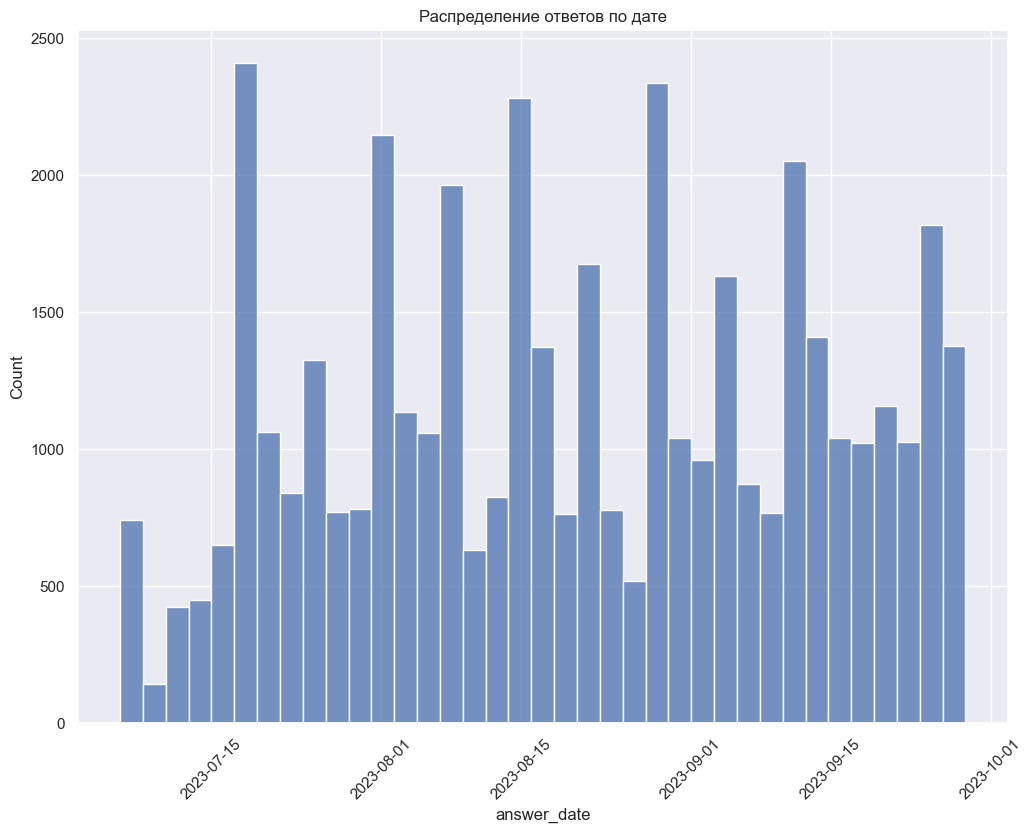

In [30]:
# answer_date найти минимальное и максимальное, посмотреть распределение количества ответов по дням
sns.histplot(data=result_df, x='answer_date')

plt.title("Распределение ответов по дате")
plt.xticks(rotation=45);

Видим что-то похожее на сезонность. Добавим дни недели, разделим на дату и время

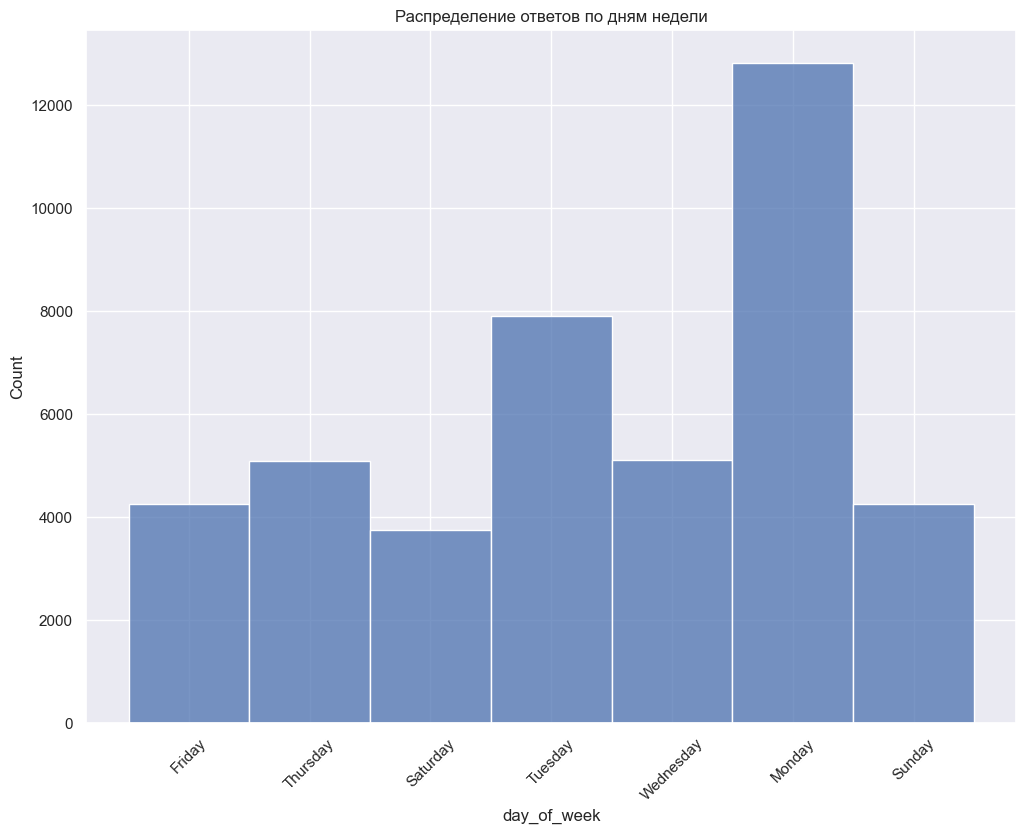

In [31]:
# дни недели
result_df['day_of_week'] = result_df['answer_date'].dt.day_name()
sns.histplot(data=result_df, x='day_of_week')

plt.title("Распределение ответов по дням недели")
plt.xticks(rotation=45);

В понедельники и вторники больше всего ответов

In [32]:
result_df['hour'] = result_df['answer_date'].dt.hour
result_df['answer_date'] = result_df['answer_date'].dt.date

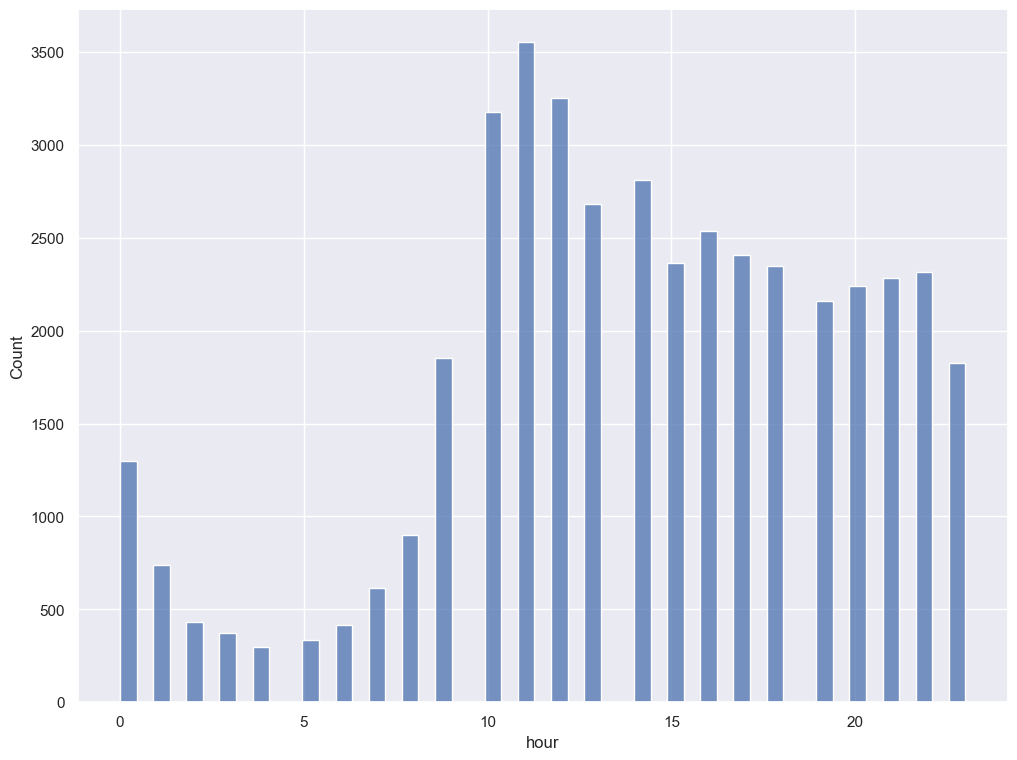

In [33]:
sns.histplot(data=result_df, x='hour');

Наиболее активное время обучения - день.  
Можно поставить метки для категоризации времени суток

In [34]:
# Метки времени
result_df['hour'] = (result_df['hour'] % 24 + 6) // 6
result_df['hour'].replace({1: '0-5',
                      2: '6-11',
                      3: '12-17',
                      4: '18-23'}, inplace=True)

In [35]:
# Наиболее частовстречающееся значение (мода) дня недели при ответе на вопросы для каждого студента
users_day_mode = result_df.groupby(['user_id','profession_name'])['day_of_week'].agg(lambda x: x.mode()).reset_index()

# Наиболее частовстречающееся значение (мода) времени при ответе на вопросы для каждого студента
users_hour_mode = result_df.groupby(['user_id','profession_name'])['hour'].agg(lambda x: x.mode()).reset_index()

# Объединим
users_time_mode = users_day_mode.merge(users_hour_mode, on=['user_id','profession_name'])

users_time_mode

,user_id,profession_name,day_of_week,hour
0,3157,data-analyst,Friday,6-11
1,5415,data-analyst,Thursday,12-17
2,8199,data-analyst,Saturday,12-17
3,8215,data-scientist,Tuesday,18-23
4,10202,data-analyst-plus,Tuesday,12-17
...,...,...,...,...
3527,16224921,sql-data-analyst,Tuesday,18-23
3528,16230604,sql-data-analyst,Saturday,18-23
3529,16271708,sql-data-analyst,Sunday,12-17
3530,16501153,data-analyst,Monday,12-17


In [36]:
print (users_time_mode['day_of_week'].value_counts())
print ('-------')
print (users_time_mode['hour'].value_counts())

Monday                 1048
Tuesday                650 
Wednesday              425 
Thursday               417 
Friday                 346 
Sunday                 341 
Saturday               304 
[Monday, Wednesday]    1   
Name: day_of_week, dtype: int64
-------
12-17            1312
18-23            1076
6-11             856 
0-5              285 
[12-17, 6-11]    1   
[12-17, 6-11]    1   
[18-23, 6-11]    1   
Name: hour, dtype: int64


Находим сдвоенные варианты, их необходимо убрать.

In [38]:
# Код, с помощью которого искали индексы кривых строк

for i in range(len(users_time_mode)):
    if type(users_time_mode['hour'][i])!=str:
        print(i)

1016
1663
1774


In [39]:
users_time_mode.loc[1774, 'day_of_week'] = 'Monday'
users_time_mode.loc[1016, 'hour'] = '12-17'
users_time_mode.loc[1663, 'hour'] = '12-17'
users_time_mode.loc[1774, 'hour'] = '6-11'

In [40]:
def bar_plot_t (t, i):
  temp_df = users_time_mode.pivot_table(index = t,
                                  values = 'user_id',
                                  aggfunc = 'count').sort_values(by='user_id',
                                                                 ascending = False)
  temp_df = temp_df.reset_index()
  sns.barplot(ax = axes[i], data = temp_df, y = t, x = 'user_id')
  axes[i].set_title('График частоты "{}"'.format(t), fontsize=20)
  axes[i].set_ylabel(t, fontsize=15)
  axes[i].set_xlabel('Частота', fontsize=15)

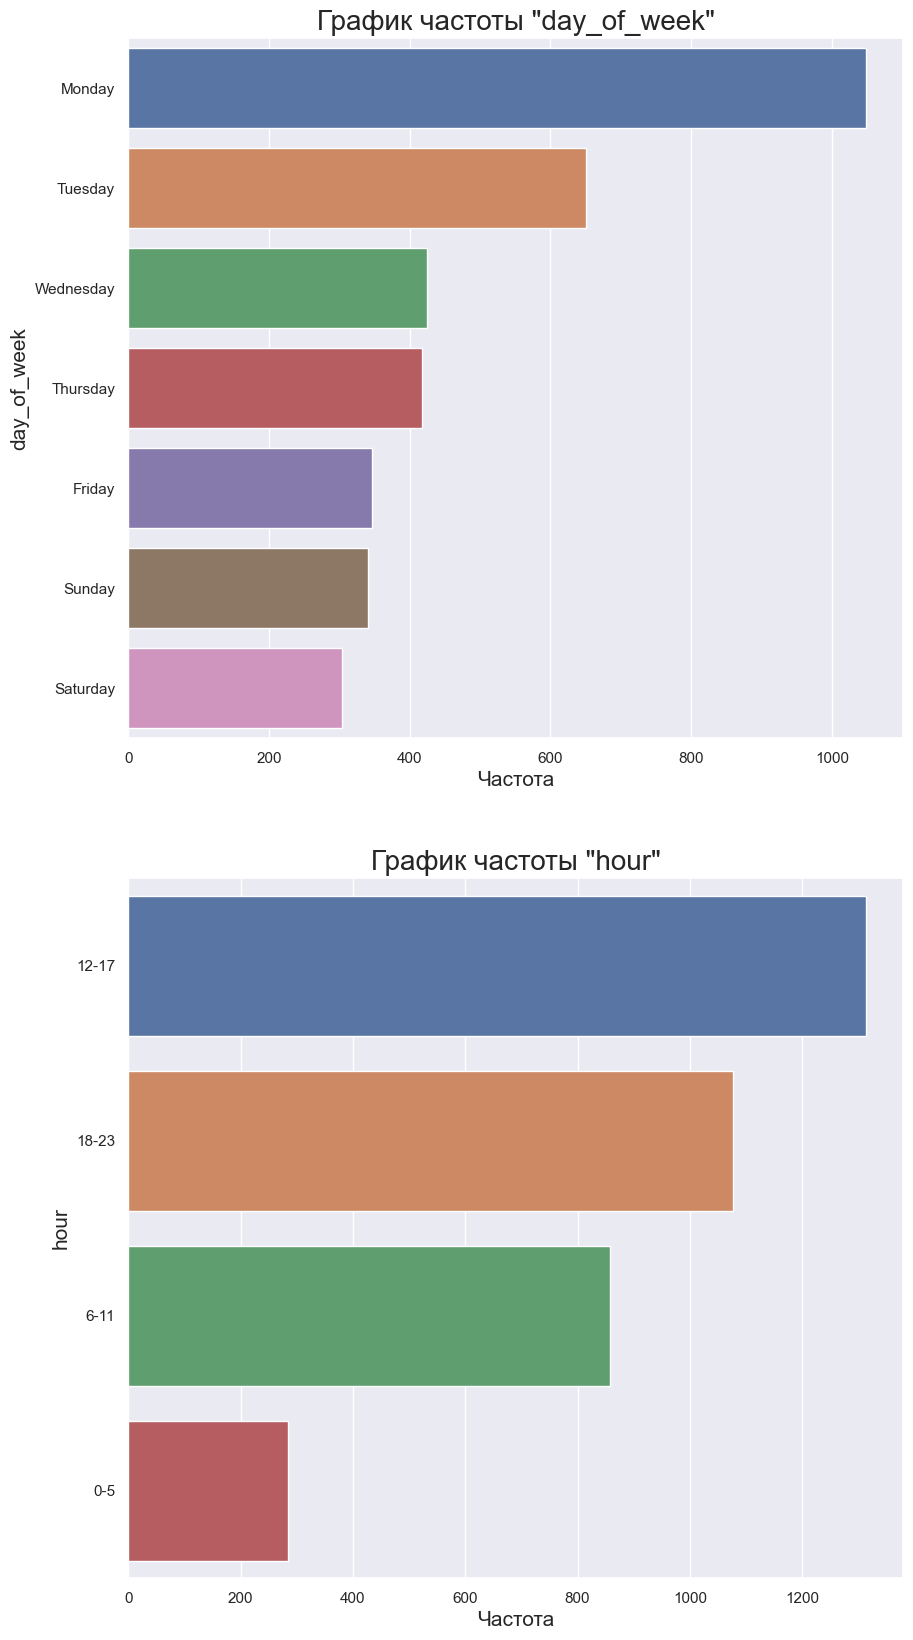

In [41]:
fig, axes = plt.subplots(2, figsize=(10, 20))

for i, t in zip(range(2), ['day_of_week', 'hour']):
  bar_plot_t(t, i)

**Некоторые выводы:**
у нас есть наиболее частые метки времени для каждого пользователя. По ним можно группировать.

##### answer_id 
почему повторяются answer_id?

In [42]:
result_df['answer_id'].value_counts()[result_df['answer_id'].value_counts()<2]

09d61d7c-f933-425a-9141-e29df7832af7    1
e6a2f48f-252a-48a0-81ff-22f1415a8d7f    1
f68f995a-958f-4b33-b99b-2bdf7124139b    1
89b5ba4d-f91b-4482-99b8-e1ab320dc509    1
bb16a101-1fb6-4d8f-a09e-e3ff98cc84c8    1
                                       ..
73b4fe23-7173-479c-8d44-a8ed2a2dea79    1
ad685558-f451-4d81-8894-f12347f5850c    1
b51a27b2-3790-4404-8775-010188c5e416    1
608109bb-5c45-412e-b05d-1c48d9fe6667    1
f5932ca2-bd90-4952-a679-91107c6bc9e6    1
Name: answer_id, Length: 3754, dtype: int64

In [43]:
# Пример для ид ответа '22f30f57-992d-43f2-8b7f-e65076eeb551'
result_df.loc[result_df['answer_id']=='22f30f57-992d-43f2-8b7f-e65076eeb551']

,user_id,answer_date,answer_id,cohort,current_cohort,current_segment,original_segment,profession_name,question_title,question_type,user_answer,mean_perf_evaluation,is_perf_grow,mean_user_recommend_value,mean_value_statement_content,day_of_week,hour
32024,14786893,2023-07-05,22f30f57-992d-43f2-8b7f-e65076eeb551,data_cohort_115,data_cohort_117,b2g,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,персональная карьерная консультация,0.641,1.0,NaN,-1.2,Wednesday,18-23
32026,14786893,2023-07-05,22f30f57-992d-43f2-8b7f-e65076eeb551,data_cohort_115,data_cohort_117,b2g,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,решение тестовых заданий,0.641,1.0,NaN,-1.2,Wednesday,18-23
32027,14786893,2023-07-05,22f30f57-992d-43f2-8b7f-e65076eeb551,data_cohort_115,data_cohort_117,b2g,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,оценка шансов на трудоустройство,0.641,1.0,NaN,-1.2,Wednesday,18-23
32029,14786893,2023-07-05,22f30f57-992d-43f2-8b7f-e65076eeb551,data_cohort_115,data_cohort_117,b2g,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,определение стратегии поиска работы,0.641,1.0,NaN,-1.2,Wednesday,18-23
32031,14786893,2023-07-05,22f30f57-992d-43f2-8b7f-e65076eeb551,data_cohort_115,data_cohort_117,b2g,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,сопроводительное письмо,0.641,1.0,NaN,-1.2,Wednesday,18-23
32034,14786893,2023-07-05,22f30f57-992d-43f2-8b7f-e65076eeb551,data_cohort_115,data_cohort_117,b2g,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,оформление портфолио,0.641,1.0,NaN,-1.2,Wednesday,18-23


checkbox - поэтому и повторы, множественный выбор

##### current_segment	и original_segment


In [44]:
# Сравнение изменений по сегментам
# Таблица со всеми сегментами для каждого студента
segments_users = result_df.groupby(['user_id','profession_name']).agg({'current_segment':('first','last'),
                                                    'original_segment':('first','last')}).set_axis(['cur_segm_first',
                                                                                                    'cur_segm_last',
                                                                                                    'orig_segm_first',
                                                                                                    'orig_segm_last'],
                                                                                                    axis=1,
                                                                                                    inplace=False).reset_index()
segments_users

C:\Users\user\AppData\Local\Temp\ipykernel_12500\2078819999.py:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  segments_users = result_df.groupby(['user_id','profession_name']).agg({'current_segment':('first','last'),


,user_id,profession_name,cur_segm_first,cur_segm_last,orig_segm_first,orig_segm_last
0,3157,data-analyst,b2g,b2g,b2g,b2g
1,5415,data-analyst,b2g,b2g,b2g,b2g
2,8199,data-analyst,b2c,b2c,b2c,b2c
3,8215,data-scientist,b2c,b2c,b2c,b2c
4,10202,data-analyst-plus,b2g,b2g,b2g,b2g
...,...,...,...,...,...,...
3527,16224921,sql-data-analyst,b2c,b2c,b2c,b2c
3528,16230604,sql-data-analyst,b2c,b2c,b2c,b2c
3529,16271708,sql-data-analyst,b2c,b2c,b2c,b2c
3530,16501153,data-analyst,b2c,b2c,b2c,b2c


Поставим метки для тех, кто сменил сегмент

In [45]:
segments_users['is_segment_changed'] = np.where(((segments_users['cur_segm_first']==segments_users['cur_segm_last'])\
                                                 &(segments_users['orig_segm_first']==segments_users['orig_segm_last'])\
                                                 &(segments_users['cur_segm_first']==segments_users['orig_segm_first'])), 0, 1)
segments_users

,user_id,profession_name,cur_segm_first,cur_segm_last,orig_segm_first,orig_segm_last,is_segment_changed
0,3157,data-analyst,b2g,b2g,b2g,b2g,0
1,5415,data-analyst,b2g,b2g,b2g,b2g,0
2,8199,data-analyst,b2c,b2c,b2c,b2c,0
3,8215,data-scientist,b2c,b2c,b2c,b2c,0
4,10202,data-analyst-plus,b2g,b2g,b2g,b2g,0
...,...,...,...,...,...,...,...
3527,16224921,sql-data-analyst,b2c,b2c,b2c,b2c,0
3528,16230604,sql-data-analyst,b2c,b2c,b2c,b2c,0
3529,16271708,sql-data-analyst,b2c,b2c,b2c,b2c,0
3530,16501153,data-analyst,b2c,b2c,b2c,b2c,0


Есть пользователи, которые меняли сегмент.  
Для дальнейшего анализа нам важен текущий последний сегмент и факт его смены. Поэтому оставим в таблице segments_users только `cur_segm_last` и `is_segment_changed`

In [46]:
segments_users = segments_users[['user_id','profession_name',
                                 'cur_segm_last' , 'is_segment_changed']]
segments_users

,user_id,profession_name,cur_segm_last,is_segment_changed
0,3157,data-analyst,b2g,0
1,5415,data-analyst,b2g,0
2,8199,data-analyst,b2c,0
3,8215,data-scientist,b2c,0
4,10202,data-analyst-plus,b2g,0
...,...,...,...,...
3527,16224921,sql-data-analyst,b2c,0
3528,16230604,sql-data-analyst,b2c,0
3529,16271708,sql-data-analyst,b2c,0
3530,16501153,data-analyst,b2c,0


In [47]:
def pie_cat(df, category, value, name): 
    temp_df = df.pivot_table(index = category, values = value, aggfunc = 'count')
    temp_df.plot.pie(y=value, figsize=(10, 10), autopct="%.1f%%")
    plt.title('Доля {} в общем объеме выборки'.format(name))
    plt.show()

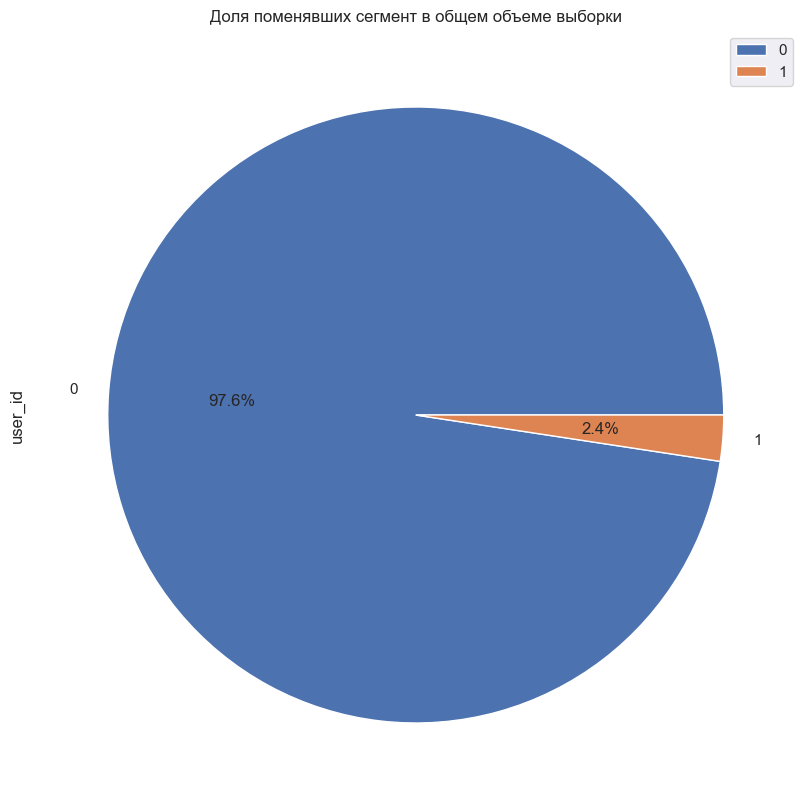

In [48]:
pie_cat(segments_users, 'is_segment_changed', 'user_id', 'поменявших сегмент')

##### profession_name	

In [49]:
result_df['profession_name'].unique()

array(['data-analyst', 'data-scientist', 'data-analyst-plus',
       'systems-analyst', 'data-scientist-plus', 'sql-data-analyst',
       'data-engineer', 'datavis-and-bi-tools', 'data-science-bootcamp',
       'math-for-da-ds', 'data-analyst-bootcamp'], dtype=object)

Можно укрупить категории (но надо ли???), объеденив  
 ['data-analyst',  'data-analyst-plus','sql-data-analyst', 'datavis-and-bi-tools','data-analyst-bootcamp'] в DA,  
 ['data-scientist','data-scientist-plus','data-science-bootcamp'] в DS,  
 ['systems-analyst','data-engineer', 'math-for-da-ds'] в другое. 

In [50]:
result_df.groupby('user_id').agg({'profession_name':('first','last','unique','nunique')})

profession_name                                                
                      first               last               unique nunique
user_id                                                                    
3157      data-analyst       data-analyst       [data-analyst]       1     
5415      data-analyst       data-analyst       [data-analyst]       1     
8199      data-analyst       data-analyst       [data-analyst]       1     
8215      data-scientist     data-scientist     [data-scientist]     1     
10202     data-analyst-plus  data-analyst-plus  [data-analyst-plus]  1     
...                ...                ...                  ...      ..     
16224921  sql-data-analyst   sql-data-analyst   [sql-data-analyst]   1     
16230604  sql-data-analyst   sql-data-analyst   [sql-data-analyst]   1     
16271708  sql-data-analyst   sql-data-analyst   [sql-data-analyst]   1     
16501153  data-analyst       data-analyst       [data-analyst]       1     
16535210  data-analyst       data-analyst       [data-analyst]       1     

[3524 rows x 4 columns]

Всего 8 студентов поменяли профессию. Признак смены профессии учитывать не будем.

In [51]:
# Сравнение изменений по когортам
# Таблица со всеми когортами для каждого студента 	
cohort_users = result_df.groupby(['user_id','profession_name']).agg({'cohort':('first','last'),
                                                 'current_cohort':('first','last')}).set_axis(['cur_coh_first',
                                                                                                    'cur_coh_last',
                                                                                                    'orig_coh_first',
                                                                                                    'orig_coh_last'],
                                                                                                    axis=1,
                                                                                                    inplace=False).reset_index()

cohort_users['is_cohort_changed'] = np.where(((cohort_users['cur_coh_first']==cohort_users['cur_coh_last'])\
                                                 &(cohort_users['orig_coh_first']==cohort_users['orig_coh_last'])\
                                                 &(cohort_users['cur_coh_first']==cohort_users['orig_coh_first'])), 0, 1)

cohort_users = cohort_users[['user_id','profession_name', 'is_cohort_changed']]
cohort_users

C:\Users\user\AppData\Local\Temp\ipykernel_12500\2189235798.py:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  cohort_users = result_df.groupby(['user_id','profession_name']).agg({'cohort':('first','last'),


,user_id,profession_name,is_cohort_changed
0,3157,data-analyst,0
1,5415,data-analyst,1
2,8199,data-analyst,0
3,8215,data-scientist,0
4,10202,data-analyst-plus,0
...,...,...,...
3527,16224921,sql-data-analyst,0
3528,16230604,sql-data-analyst,0
3529,16271708,sql-data-analyst,0
3530,16501153,data-analyst,0


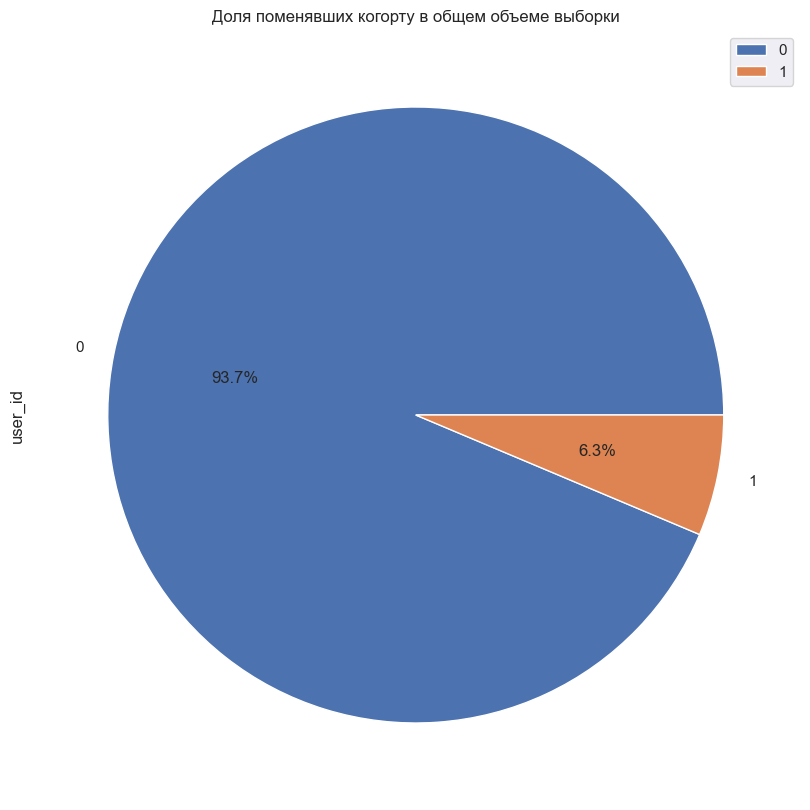

In [52]:
pie_cat(cohort_users, 'is_cohort_changed', 'user_id', 'поменявших когорту')

##### question_title	и question_type	


In [53]:
# Соответствие вопросов, типов и ответов
result_df.groupby(['question_title']).agg({'question_type':['unique','nunique'], 'user_answer':['unique','nunique']})

question_type  \
                                                                                                                                                                                                                                                                           unique   
question_title                                                                                                                                                                                                                                                                      
Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:  [radio]        
В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.                                                                   [radio]        
Возможно вы нашли работу за время обучения?                                                                                                                                                                                                                          [radio]        
Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.                                                                                                                                                               [checkbox]     
Планируете ли вы записаться на Карьерный Трек?                                                                                                                                                                                                                       [radio]        
Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.                                                                                                                                                                                  [text]         

                                                                                                                                                                                                                                                                             \
                                                                                                                                                                                                                                                                    nunique   
question_title                                                                                                                                                                                                                                                                
Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:  1        
В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.                                                                   1        
Возможно вы нашли работу за время обучения?                                                                                                                                                                                                                          1        
Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.                                      

У каждого вопроса только один тип

##### user_answer

In [54]:
# В отдельной переменной сохраним series c текстовыми ответами, попробуем найти закономерности 
text_ans = result_df.loc[result_df['question_title']=="Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа."]['user_answer']

In [55]:
result_df['user_answer'].value_counts()

Нет                                                                         2734
резюме                                                                      2679
оформление портфолио                                                        2595
прохождение собеседований                                                   2578
решение тестовых заданий                                                    2429
                                                                            ... 
Нужно будет брать академ и проходить этот момент ещё раз                    1   
M                                                                           1   
Пока карьерный трек мне не нужен, но я запишусь после дипломного проекта    1   
Пока спросить нечего.                                                       1   
Не берут без опыта работы                                                   1   
Name: user_answer, Length: 1095, dtype: int64

In [56]:
result_df['user_answer'].value_counts().head(20)

Нет                                                      2734
резюме                                                   2679
оформление портфолио                                     2595
прохождение собеседований                                2578
решение тестовых заданий                                 2429
сопроводительное письмо                                  2426
определение стратегии поиска работы                      2304
Сменить работу.                                          2301
оценка шансов на трудоустройство                         2241
Нет опыта работы в IT и в направлении Анализа данных.    2240
персональная карьерная консультация                      1946
Да, планирую записаться после диплома                    1930
устройство рынка труда                                   1742
как и куда можно расти как специалисту                   1725
определение профессиональной сферы                       1652
Да, уже записался                                        1286
как гово

То есть среди топ-20 ответов на доп. вопросы лидируют ответы по блокам:
* составление артефактов, стратегии
* собеседования/консультации
* оценка рынка труда/куда расти
* помощь с трудоустройством/смена работы
* что-то про личные мотивы (например, как говорить про повышение)

In [57]:
# Сколько уникальных ответов на каждый вопрос было получено от каждого студента
result_df.pivot_table(values='user_answer', index=['user_id','profession_name'],
                    columns='question_title', aggfunc='nunique').sort_values(by="Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",
                                                                             ascending=False)

,question_title,"Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:",В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.,Возможно вы нашли работу за время обучения?,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",Планируете ли вы записаться на Карьерный Трек?,"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа."
user_id,profession_name,,,,,,
14971197,data-analyst,1.0,1.0,1.0,13.0,1.0,1.0
776139,data-scientist,1.0,1.0,1.0,13.0,1.0,1.0
14919217,data-scientist,1.0,1.0,1.0,13.0,1.0,1.0
15258642,data-analyst,1.0,1.0,1.0,13.0,1.0,1.0
381062,data-analyst,1.0,1.0,1.0,13.0,1.0,1.0
...,...,...,...,...,...,...,...
15579587,datavis-and-bi-tools,NaN,1.0,NaN,NaN,NaN,NaN
15629755,data-analyst,NaN,1.0,NaN,NaN,NaN,NaN
15630621,sql-data-analyst,NaN,1.0,NaN,NaN,NaN,NaN


Текст вопросов очень длинный. Заменим его на более короткий.  


In [58]:
dict_questions = {"Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:":"цель", 
"В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.":"опыт", 	
"Возможно вы нашли работу за время обучения?"	: "нашёл работу?", 	
"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.":"над чем поработать", 	 
"Планируете ли вы записаться на Карьерный Трек?":"планы на трек", 	 	 
"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.":"комментарии",}

result_df['question_title'] = result_df['question_title'].replace(dict_questions)

### Сформулируем основные цели для студентов

1. Продвинуться по карьерной лестнице.
2. Сменить работу.
3. Развить свой бизнес.
4. Структурировать уже полученные навыки и знания.
5. Получить новые навыки для общего развития.
6. Получить новые знания, чтобы повысить зарплату.
7. Нет определённой цели в обучении.

Посмотрим на тексты зашитых ответов для каждого вопроса, кроме свободного

In [59]:
for q in result_df.query('question_title!="комментарии"')['question_title'].unique():
  print("--"*10)
  print(q)
  print("--"*10)
  for ans in result_df.query('question_title==@q')['user_answer'].unique():
    print(ans)

--------------------
над чем поработать
--------------------
определение профессиональной сферы
персональная карьерная консультация
устройство рынка труда
как и куда можно расти как специалисту
сопроводительное письмо
резюме
решение тестовых заданий
оценка шансов на трудоустройство
определение стратегии поиска работы
прохождение собеседований
оформление портфолио
как говорить про повышение
не думаю, что вы можете мне с чем-то помочь
--------------------
цель
--------------------
Продвинуться по карьерной лестнице.
Сменить работу.
Развить свой бизнес. 
Структурировать уже полученные навыки и знания.
Получить новые навыки для общего развития.
Получить новые знания, чтобы повысить зарплату.
Нет определённой цели в обучении.
--------------------
нашёл работу?
--------------------
Да
Нет
В активном поиске
--------------------
опыт
--------------------
Нет опыта работы в IT и в направлении Анализа данных.
От 1 года опыта работы в другом направлении IT.
Более 3 лет опыта работы в направлении 

In [60]:
def bar_plot_q (q, i):
  temp_df = result_df[result_df['question_title'] == q].pivot_table(index = 'user_answer', 
                                                          values = 'user_id', 
                                                          aggfunc = 'count').sort_values(by='user_id',
                                                                                         ascending = False)
  temp_df = temp_df.reset_index()
  sns.barplot(ax = axes[i], data = temp_df, y = 'user_answer', x = 'user_id')
  axes[i].set_title('График частоты вариантов ответа на вопрос "{}"'.format(q), fontsize=20)
  axes[i].set_ylabel('Варианты ответов', fontsize=15)
  axes[i].set_xlabel('Частота', fontsize=15)

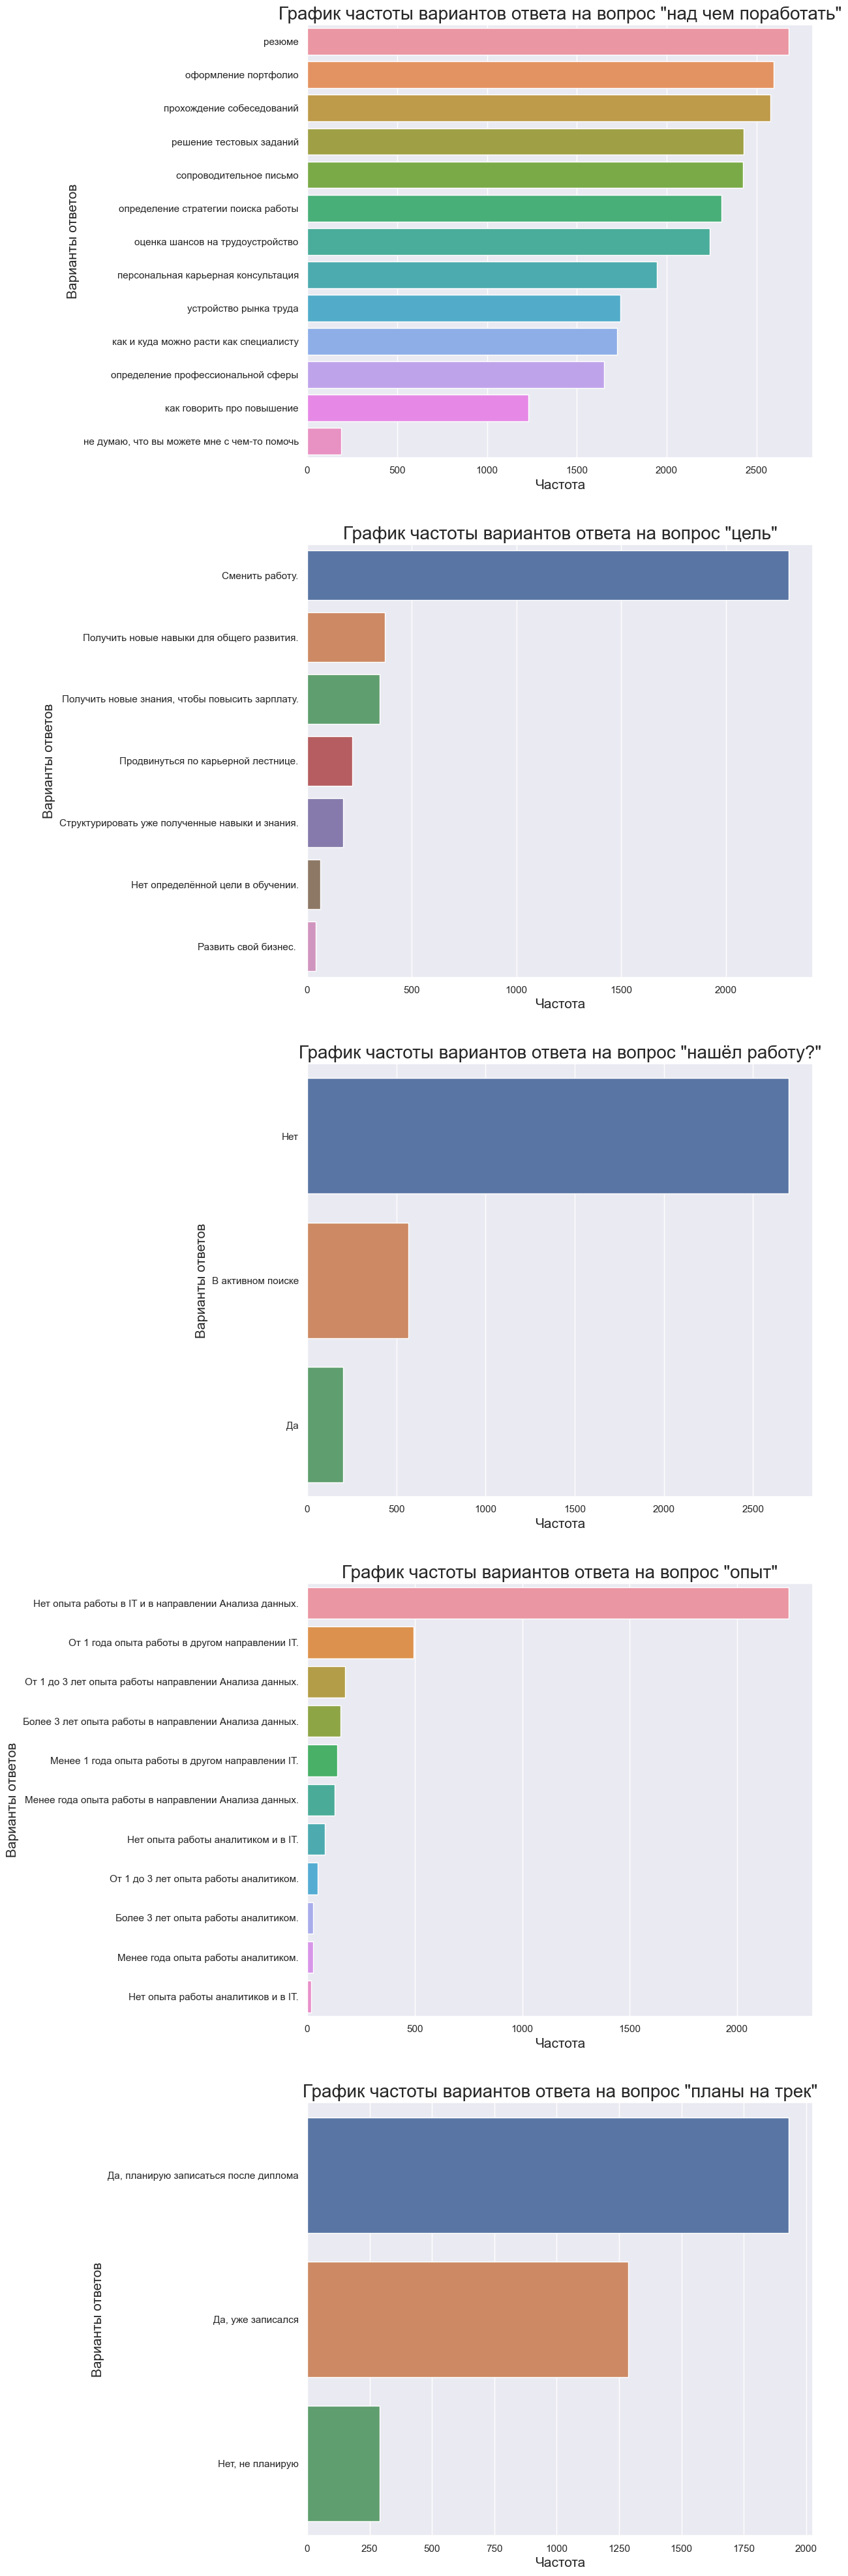

In [61]:
fig, axes = plt.subplots(5, figsize=(10, 50))

for i, q in zip(range(5), 
                list(result_df.query('question_title!="комментарии"')['question_title'].unique())):
  bar_plot_q(q, i)

нужно заменить одинаковые по смыслу ответы в вопросе про опыт, т.к. есть неявные дубли  и длинные ответы


In [62]:
dict_expier_ans = {"Нет опыта работы в IT и в направлении Анализа данных.":"Нет опыта", 
                   "Нет опыта работы аналитиком и в IT.":"Нет опыта",
                   "Нет опыта работы аналитиков и в IT.":"Нет опыта", 
                   "Более 3 лет опыта работы в направлении Анализа данных.":"Более 3 лет опыта",
                    "Более 3 лет опыта работы аналитиком.":"Более 3 лет опыта", 
                   "От 1 до 3 лет опыта работы направлении Анализа данных.": "От 1 до 3 лет аналитиком?",
                    "От 1 до 3 лет опыта работы аналитиком.": "От 1 до 3 лет аналитиком?",
                   "От 1 года опыта работы в другом направлении IT.":"От 1 года опыта др.", 
                   "Менее года опыта работы в направлении Анализа данных.":"Менее года в аналитике", 
                    "Менее года опыта работы аналитиком.":"Менее года в аналитике",
                   "Менее 1 года опыта работы в другом направлении IT.":"Менее 1 года опыта др.",
                   
                   "определение профессиональной сферы":"профориентация",
"персональная карьерная консультация":"персональная консультация",
"как и куда можно расти как специалисту":"куда расти",
"сопроводительное письмо":"сопроводительное",
"решение тестовых заданий":"тестовые",
"определение стратегии поиска работы":"стратегия поиска работы",
"прохождение собеседований":"собеседования",
"оформление портфолио":"портфолио",
"как говорить про повышение":"про повышение",
"не думаю, что вы можете мне с чем-то помочь":"практикум не сможет помочь",

"Да, планирую записаться после диплома":"да, план",
"Да, уже записался":"да, уже",
"Нет, не планирую":"нет",

"Продвинуться по карьерной лестнице.":"карьера",
"Развить свой бизнес. " :"бизнес",
"Структурировать уже полученные навыки и знания.":"структурировать знания",
"Получить новые навыки для общего развития.":"новые знания - общее развитие",
"Получить новые знания, чтобы повысить зарплату.":"новые знания - рост ЗП",
"Нет определённой цели в обучении.":"нет цели",
}

result_df['user_answer'] = result_df['user_answer'].replace(dict_expier_ans)

Добавляем столбцы с категориальными признаками 1 - студент ответил на этот вопрос этим ответом, 0 - не ответил  
Например, вопрос: "опыт" и ответ "Нет опыта работы в IT и в направлении Анализа данных."

In [63]:
# Список вопросов
questions_list = result_df.query('question_title!="комментарии"')['question_title'].unique()

# Таблица ответов пользователей, без комментариев
users_answers = result_df.query('question_title!="комментарии"').pivot_table(values='user_answer', 
                                                                              index=['user_id','profession_name'],
                                                                              columns='question_title',
                                                                              aggfunc='last')

for col in users_answers.columns:
  users_answers = pd.concat([users_answers, pd.get_dummies(users_answers[col], prefix=col)], axis=1)

users_answers

,,над чем поработать,нашёл работу?,опыт,планы на трек,цель,над чем поработать_куда расти,над чем поработать_оценка шансов на трудоустройство,над чем поработать_персональная консультация,над чем поработать_портфолио,над чем поработать_практикум не сможет помочь,...,"планы на трек_да, план","планы на трек_да, уже",планы на трек_нет,цель_Сменить работу.,цель_бизнес,цель_карьера,цель_нет цели,цель_новые знания - общее развитие,цель_новые знания - рост ЗП,цель_структурировать знания
user_id,profession_name,,,,,,,,,,,,,,,,,,,,,
3157,data-analyst,тестовые,Да,Нет опыта,"да, план",карьера,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
5415,data-analyst,стратегия поиска работы,Нет,От 1 года опыта др.,"да, план",Сменить работу.,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
8199,data-analyst,портфолио,Нет,Нет опыта,"да, уже",Сменить работу.,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
8215,data-scientist,персональная консультация,Нет,Нет опыта,"да, план",Сменить работу.,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
10202,data-analyst-plus,стратегия поиска работы,Нет,Более 3 лет опыта,"да, уже",бизнес,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16224921,sql-data-analyst,сопроводительное,Нет,Нет опыта,нет,Сменить работу.,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
16230604,sql-data-analyst,практикум не сможет помочь,Да,Менее года в аналитике,нет,новые знания - общее развитие,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
16271708,sql-data-analyst,оценка шансов на трудоустройство,В активном поиске,Нет опыта,"да, план",Сменить работу.,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [64]:
# Отдельная переменная для бинарных ответов на вопросы
users_answers_binary = users_answers.drop(columns=questions_list)

# Текстовые ответы в отдельную переменную
users_answers = users_answers[questions_list]

### Строим общую таблицу

In [65]:
# Группируем result_df по студенту и его профессии 
final_df = result_df.groupby(['user_id','profession_name']).agg({'answer_id':'nunique', # Количество ответов, которые дал студент
                                                      'mean_perf_evaluation':'last',
                                                      'is_perf_grow':'last', 
                                                      'mean_user_recommend_value':'last', 
                                                      'mean_value_statement_content':'last'}).reset_index()

# Добавляем остальные показатели
for df in [users_time_mode, segments_users, cohort_users, users_answers_binary]:
  final_df = final_df.merge(df, on = ['user_id','profession_name']) 
final_df                                               

,user_id,profession_name,answer_id,mean_perf_evaluation,is_perf_grow,mean_user_recommend_value,mean_value_statement_content,day_of_week,hour,cur_segm_last,...,"планы на трек_да, план","планы на трек_да, уже",планы на трек_нет,цель_Сменить работу.,цель_бизнес,цель_карьера,цель_нет цели,цель_новые знания - общее развитие,цель_новые знания - рост ЗП,цель_структурировать знания
0,3157,data-analyst,4,0.661,0.0,NaN,1.250,Friday,6-11,b2g,...,1,0,0,0,0,1,0,0,0,0
1,5415,data-analyst,4,0.775,1.0,NaN,0.000,Thursday,12-17,b2g,...,1,0,0,1,0,0,0,0,0,0
2,8199,data-analyst,4,0.711,0.0,NaN,-0.167,Saturday,12-17,b2c,...,0,1,0,1,0,0,0,0,0,0
3,8215,data-scientist,4,0.686,1.0,NaN,0.167,Tuesday,18-23,b2c,...,1,0,0,1,0,0,0,0,0,0
4,10202,data-analyst-plus,4,0.756,0.0,NaN,0.500,Tuesday,12-17,b2g,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3527,16224921,sql-data-analyst,4,NaN,NaN,NaN,NaN,Tuesday,18-23,b2c,...,0,0,1,1,0,0,0,0,0,0
3528,16230604,sql-data-analyst,4,NaN,NaN,NaN,NaN,Saturday,18-23,b2c,...,0,0,1,0,0,0,0,1,0,0
3529,16271708,sql-data-analyst,4,NaN,NaN,NaN,NaN,Sunday,12-17,b2c,...,1,0,0,1,0,0,0,0,0,0
3530,16501153,data-analyst,4,NaN,NaN,NaN,NaN,Monday,12-17,b2c,...,1,0,0,0,1,0,0,0,0,0


In [66]:
miss_table(final_df)

,% miss,# miss
user_id,0.000000,0
profession_name,0.000000,0
answer_id,0.000000,0
mean_perf_evaluation,10.928652,386
is_perf_grow,10.928652,386
mean_user_recommend_value,84.881087,2998
mean_value_statement_content,10.928652,386
day_of_week,0.000000,0
hour,0.000000,0
cur_segm_last,0.000000,0


Есть пропуски - заменим медианной по профессиям, т.к. медиана меньше даст искажений, а по профессиям, потому что - это одна из основных и стабильных характеристик студентов - мало переходов среди них в другие

In [67]:
# Для каждой колонки с пропусками заменяем наны на медианное значение по этой колонке с учётом группировки по профессии
for column_with_nan in ['mean_perf_evaluation','is_perf_grow','mean_value_statement_content']:
    for prof_type in final_df['profession_name'].unique():
        final_df[column_with_nan] = final_df[column_with_nan].fillna(final_df.groupby('profession_name')[column_with_nan].transform('median')) 
    
    display(f'Количество пропусков после их замены в столбце {column_with_nan}', final_df[column_with_nan].isna().sum())

'Количество пропусков после их замены в столбце mean_perf_evaluation'

27

'Количество пропусков после их замены в столбце is_perf_grow'

27

'Количество пропусков после их замены в столбце mean_value_statement_content'

27

пропуски скорее всего там , где профессия datavis-and-bi-tools

In [68]:
final_df[final_df['profession_name']=="datavis-and-bi-tools"].index

Int64Index([  58,  146,  165,  176,  249,  271,  292,  352,  362,  522,  575,
             777,  932,  974, 1016, 2048, 2076, 2126, 2459, 2913, 3322, 3447,
            3453, 3458, 3488, 3490, 3514],
           dtype='int64')

да, это так. удалим их из final_df. Мы можем вернуться к изучению ответов студентов этой профессии потом, получив данные из result_df.

In [69]:
final_df.drop(index=final_df[final_df['profession_name']=="datavis-and-bi-tools"].index, inplace=True)

In [70]:
miss_table(final_df)

,% miss,# miss
user_id,0.000000,0
profession_name,0.000000,0
answer_id,0.000000,0
mean_perf_evaluation,0.000000,0
is_perf_grow,0.000000,0
mean_user_recommend_value,84.764622,2971
mean_value_statement_content,0.000000,0
day_of_week,0.000000,0
hour,0.000000,0
cur_segm_last,0.000000,0


In [71]:
final_df['mean_user_recommend_value'].value_counts(dropna=False)

NaN     2971
10.0    222 
8.0     98  
9.0     74  
7.0     56  
5.0     36  
6.0     18  
4.0     9   
3.0     7   
2.0     5   
0.0     4   
4.5     1   
6.5     1   
1.0     1   
7.5     1   
3.5     1   
Name: mean_user_recommend_value, dtype: int64

### Выводы:

На данном этапе мы провели исследовательский анализ данных. Для этого мы построили визуализации по наиболее частым ответам пользователей, а также сформировали таблицы пересечений между собой.

## Портреты студентов


---



**Описание раздела:**
В данном разделе будет проведена группировка студентов с использованием сводных таблиц и хитмапов, а также с помощью кластеризации.

### Сводные таблицы и хитмапы по ответам на вопросы 

In [72]:
# Сделаем отдельную табличку для графиков, где вынесем id из индексов
users_answers_for_plot = users_answers.reset_index()

In [73]:
users_answers_for_plot.columns

Index(['user_id', 'profession_name', 'над чем поработать', 'цель',
       'нашёл работу?', 'опыт', 'планы на трек'],
      dtype='object')

In [74]:
# y_value - это основная переменная, по которой мы прогоняем все хитмапы, например "цель обучения"
# x_value - это список столбцов по которым мы хотим получит хитмапы
# x_value - это именно список, одно значение давать не надо, крашится код
# В параметр df мы загоняем наш датафрейм без тех значений, что искривляют хитмап, например "Сменить работу"

def heatmap_for_target(df, y_value, x_value):
  fig, axes = plt.subplots(len(x_value), figsize=(20, 20*len(x_value)))

  for i, q in zip(range(len(x_value)), x_value):
    temp_df = df.pivot_table(index = y_value, 
                            values = 'user_id', 
                            columns = q,
                            aggfunc = 'count')
    
    sns.heatmap(ax = axes[i], data = temp_df, annot=True, fmt='.2g')
    axes[i].set_title('Хитмеп ответов пользователей на вопросы', fontsize=20)
    axes[i].set_ylabel(y_value, fontsize=15)
    axes[i].set_xlabel(q, fontsize=15)

Ниже хитмапы сперва по всему датафрейму, а потом уже пример с исключением какого-то значения

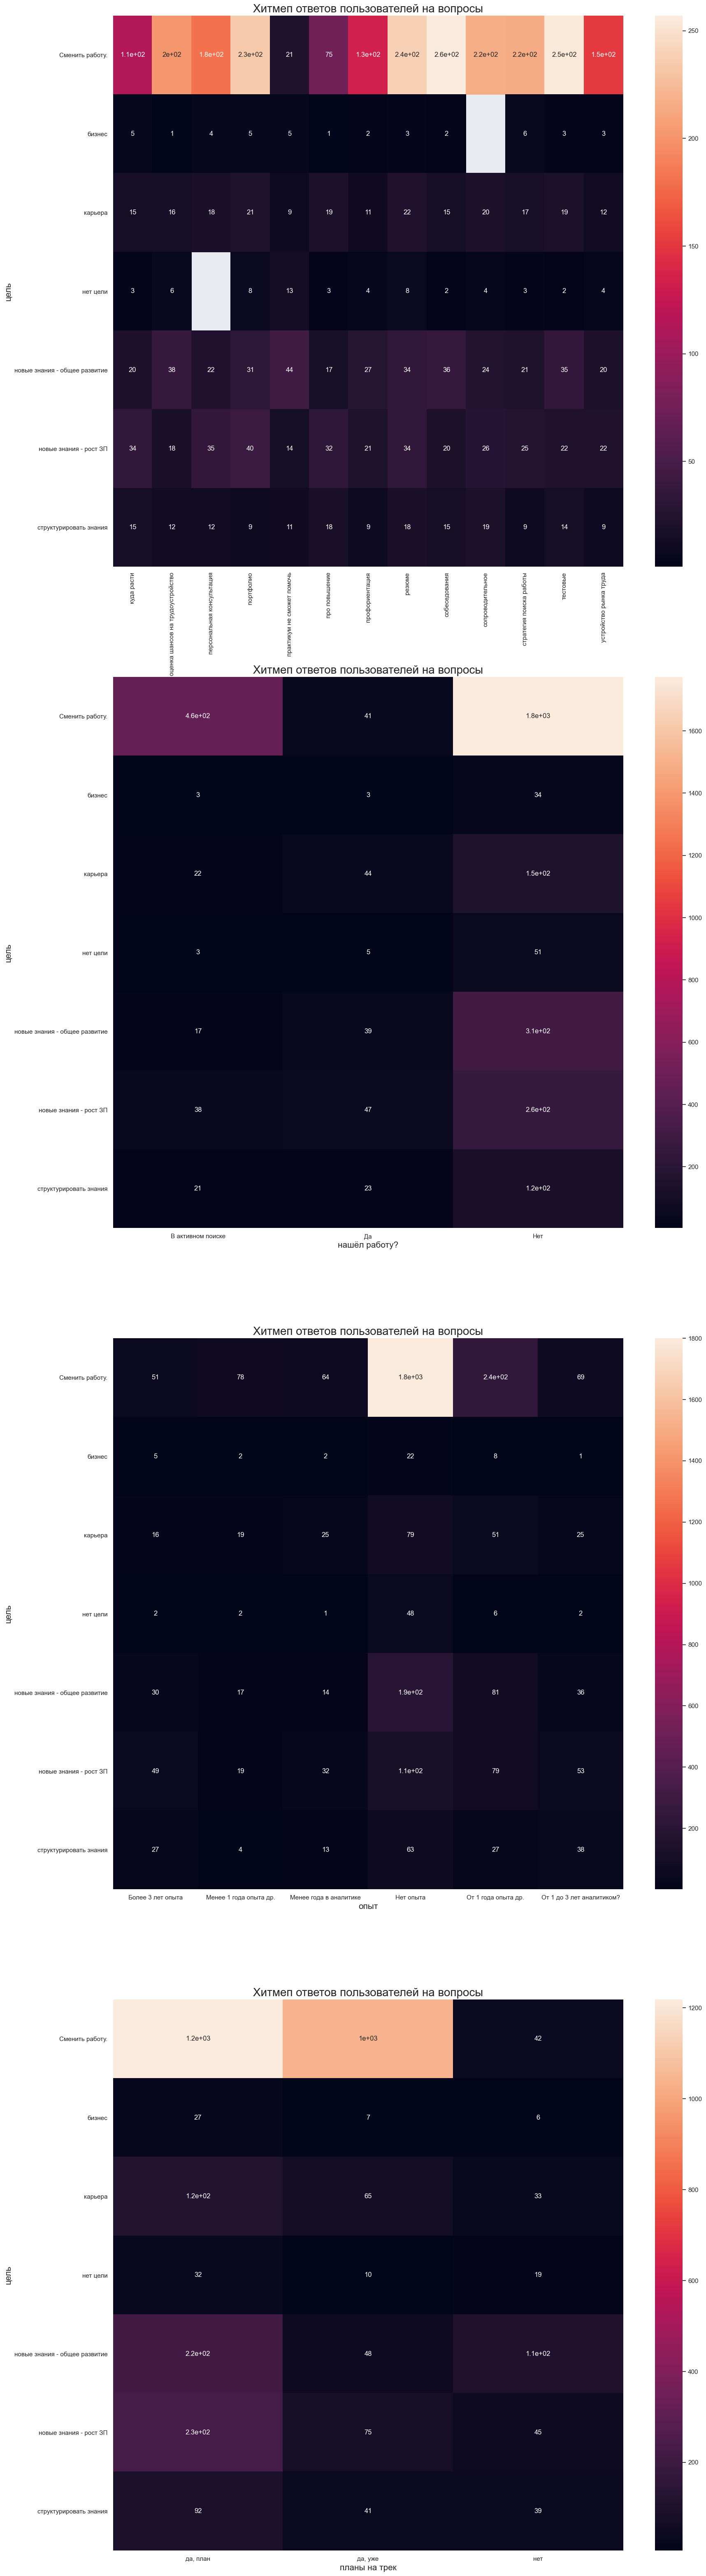

In [75]:
heatmap_for_target (df = users_answers_for_plot,
                    y_value = 'цель', 
                    x_value = ['над чем поработать','нашёл работу?', 'опыт', 'планы на трек'])

Мы построили хитмепы по пересечениям ответов на различные вопросы по целям, опыту, желанию пойти в карьерный трек, нахождению работы и тому, устроились ли они на работу в течение обучения.

Можно выделить, что основной целью для большинства студентов является смена работы - для таких пользователей характерно наибольшее количество пересечений, и среди того, над чем они хотят поработать выделяются потребность в собеседованиях, портфолио и решение тестовых.

Среди тех, кто хочет найти работу, в течение обучения работу найти пока не удалось. Или они находятся в стадии активного поиска.

Среди тех, кто хочет найти работу в основном превалируют люди без опыта.

И большинство пользователей, которые хотят сменить работу, имеют планы на карьерный трек: либо уже проходят его, либо сделают это после диплома.

**В данном хитмепе теряется наглядность для остальных факторов - наибольшее количество пользователей из когорты студентов без опыта и стремящихся сменить работу. Интересно посмотреть взаимосвязи без этих факторов.**

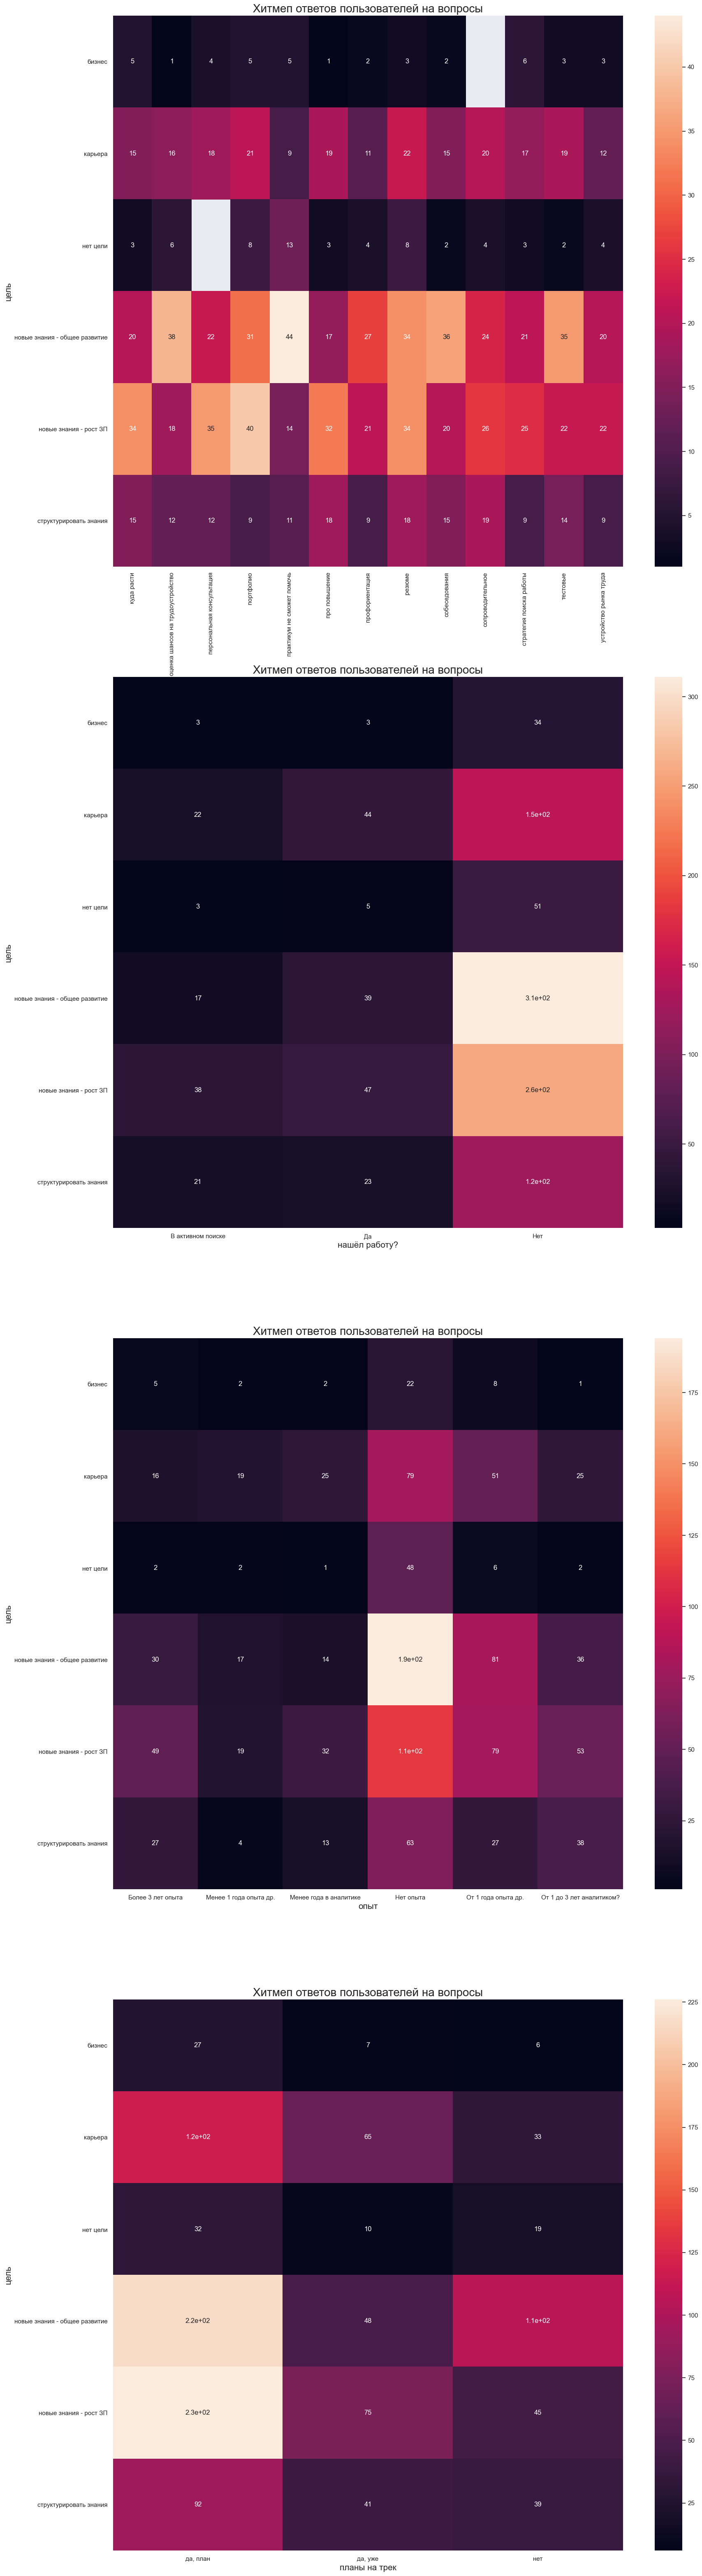

In [76]:
#Хитмап с ответами на вопросы без цели "Сменить работу"
heatmap_for_target (df = users_answers_for_plot[users_answers_for_plot['цель'] != 'Сменить работу.'],
                    y_value = 'цель', 
                    x_value = ['над чем поработать','нашёл работу?', 'опыт', 'планы на трек'])

Среди пользователей, которые выбрали основной целью не смену работы, превалирую те, кто стремятся к новым знаниям и общему развитию. При этом наибольшее количество пересечений между этим фактором и фактором невозможности практикума помочь по этой цели.

Также достаточно высоко находится цель получения новых знаний с точки зрения увеличения ЗП, и для этого фактора портфолио - это основной пункт, над чем хотят поработать студенты

Среди пользователей, которые нацелены на поиск новых знаний выделяются те, кто работу все еще на нашел.

Среди этих пользователей превалируют пользователи, которые опыта работы не имеют. 

И среди пользователей, которые нацелены на поиск новых знаний выделяются те, которые имеют планы на карьерный трек

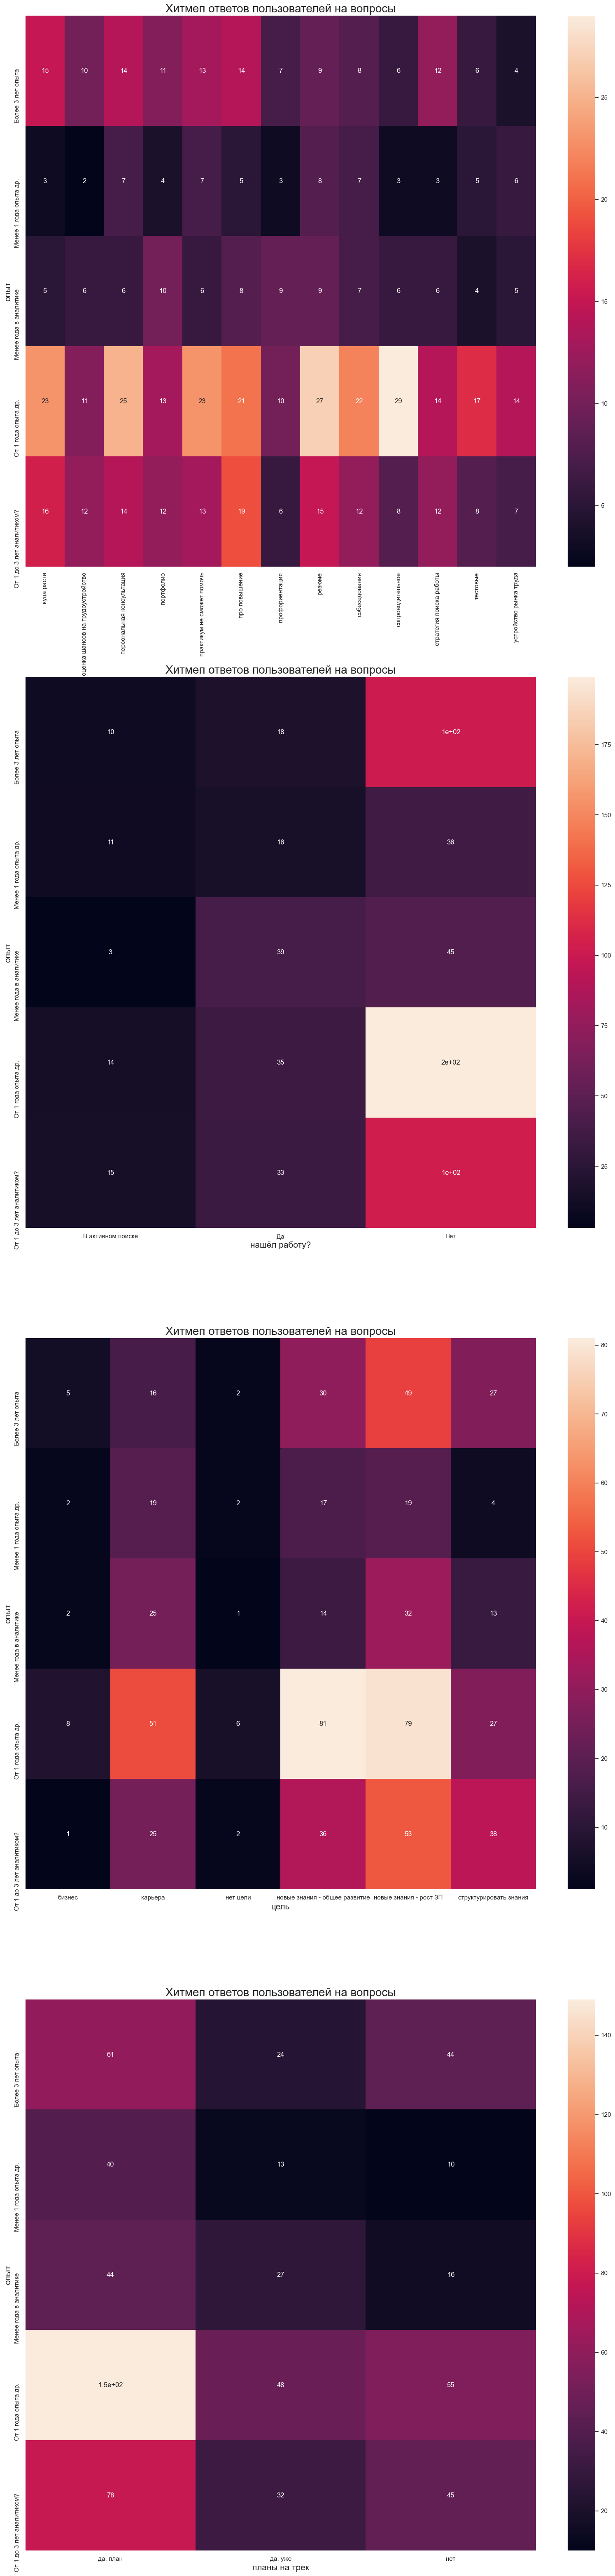

In [77]:
#Хитмап с ответами на вопросы без цели "Сменить работу" и опыта "Нет опыта"
heatmap_for_target (df = users_answers_for_plot[(users_answers_for_plot['цель'] != 'Сменить работу.') & (users_answers_for_plot['опыт'] != 'Нет опыта')],
                    y_value = 'опыт', 
                    x_value = ['над чем поработать','нашёл работу?', 'цель', 'планы на трек'])

**Некоторые выводы:**  

Мы убрали факторы "сменить работу" и "нет опыта", так как эти факторы оказывают наибольшее влияние на показатели (наибольшее количество пользователей попадают в эти группы)

А по прочим категориям пользователей:

**Опыт и цели**

* Среди взаимодействия между целями пользователя и опытом работы наибольшее значение имеют группы пользователелей с опытом работы от 1 года в другой сфере и с целями в составлении резюме, написании сопроводительных писем и карьерной консультацией. Можно предположить, что данная группа олицетворяет тех, кто осознанно подходит к процессу поиска работы и понимает, что для трудоустройства необходимы не только навыки и знания, но и так называмые "артефакты" в виде резюме, сопроводительного и портфолио.

* Среди этого хитмепа следующая группа - это аналитики с опытом от 1 до 3 лет, которые заинтересованы в изучении рынка и способов повышения в этой сфере (появляются цели в виде "как говорить про повышение" и "как расти как специалисту")

* Большинство пользователей в категории 1 год опыта работы в другой сфере практически одинаково сильно хотят узнать новые навыки для общего развития и при этом повысить свою зарплату. Большинство пользователей считает, что навыки работы с данными - это те самые новые навыки, которые могут привести к большей зарплате.

**Опыт и нашел ли работу**

* Большинство людей находятся в группе более 1 года опыта в другой сфере и при этом не нашли работу по направлению. Предполагаем, что большинство настроены в первую очередь закончить обучение и только потом заниматься активным поиском. Это также и подтверждается низким показателем активности поиска работы для всех категорий пользователей - большинство пользователей на данном этапе не склонны к активному поиску работу.

**Опыт и планы на карьерный трек**

* Как мы и описали ранее, большинство пользователей планируют записаться на карьерный трек уже после прохождения всего курса. И у этих пользователей есть опыт работы 1 года в другой сфере, и сложности с совмещением карьерного трека и трека обучения возможно связаны с объединением и работы основной, и учебы, и поиска новой работы

### Кластеризация студентов

In [78]:
# Убираем нечисловые переменные
final_df_clust = final_df.drop(columns = ['profession_name',
                                          'day_of_week',
                                          'hour',
                                          'cur_segm_last',
                                          'mean_user_recommend_value'])

In [79]:
final_df_clust = final_df_clust.dropna()

In [80]:
sc = StandardScaler()
x_sc = sc.fit_transform(final_df_clust)

In [81]:
linked = linkage(x_sc, method = 'ward')

In [82]:
#plt.figure(figsize=(15, 10))  
#dendrogram(linked, orientation='top')
#plt.title('Иерархическая кластеризация признаков')
#plt.show()

In [83]:
# Оставим 5 кластеров, как более-менее приемлемое число
km = KMeans(n_clusters=5, random_state=0)

In [84]:
labels = km.fit_predict(x_sc)

In [85]:
final_df_clust['cluster_km'] = labels

In [86]:
cluster_table = final_df_clust.drop(['user_id', 'answer_id'], axis = 1).groupby(by = 'cluster_km').mean()
cluster_table = pd.merge(cluster_table, 
                         final_df_clust.pivot_table(index = 'cluster_km',
                                                    values = 'user_id',
                                                    aggfunc = 'count'), on = 'cluster_km')

cols = cluster_table.columns.tolist()
cols = cols[-1:] + cols[:-1]
cluster_table = cluster_table[cols]

display(cluster_table.style.background_gradient('coolwarm'))

,user_id,mean_perf_evaluation,is_perf_grow,mean_value_statement_content,is_segment_changed,is_cohort_changed,над чем поработать_куда расти,над чем поработать_оценка шансов на трудоустройство,над чем поработать_персональная консультация,над чем поработать_портфолио,над чем поработать_практикум не сможет помочь,над чем поработать_про повышение,над чем поработать_профориентация,над чем поработать_резюме,над чем поработать_собеседования,над чем поработать_сопроводительное,над чем поработать_стратегия поиска работы,над чем поработать_тестовые,над чем поработать_устройство рынка труда,нашёл работу?_В активном поиске,нашёл работу?_Да,нашёл работу?_Нет,опыт_Более 3 лет опыта,опыт_Менее 1 года опыта др.,опыт_Менее года в аналитике,опыт_Нет опыта,опыт_От 1 года опыта др.,опыт_От 1 до 3 лет аналитиком?,"планы на трек_да, план","планы на трек_да, уже",планы на трек_нет,цель_Сменить работу.,цель_бизнес,цель_карьера,цель_нет цели,цель_новые знания - общее развитие,цель_новые знания - рост ЗП,цель_структурировать знания
cluster_km,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1260,0.692603,0.354762,0.772997,0.029365,0.095238,0.050000,0.105556,0.069841,0.119841,0.000000,0.034127,0.073810,0.093651,0.092857,0.081746,0.073810,0.109524,0.072222,0.000000,0.009524,0.963492,0.001587,0.021429,0.001587,0.946825,0.021429,0.007143,0.941270,0.000000,0.042857,0.721429,0.008730,0.034127,0.023016,0.111905,0.053968,0.030952
1,774,0.742385,0.302326,0.893034,0.021964,0.055556,0.094315,0.060724,0.100775,0.076227,0.000000,0.102067,0.050388,0.120155,0.096899,0.074935,0.077519,0.076227,0.055556,0.020672,0.208010,0.749354,0.174419,0.064599,0.135659,0.033592,0.399225,0.192506,0.660207,0.170543,0.164083,0.211886,0.023256,0.158915,0.011628,0.192506,0.281654,0.114987
2,815,0.709797,0.373006,0.950288,0.018405,0.041718,0.053988,0.082209,0.076074,0.107975,0.000000,0.025767,0.055215,0.093252,0.109202,0.100613,0.101840,0.120245,0.068712,0.000000,0.008589,0.980368,0.017178,0.026994,0.025767,0.815951,0.095706,0.018405,0.000000,0.996319,0.003681,0.909202,0.003681,0.023313,0.008589,0.023313,0.018405,0.013497
3,112,0.713427,0.312500,0.704783,0.026786,0.062500,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044643,0.187500,0.758929,0.098214,0.080357,0.053571,0.428571,0.232143,0.107143,0.116071,0.062500,0.821429,0.187500,0.044643,0.071429,0.116071,0.357143,0.125000,0.098214
4,544,0.693733,0.365809,1.035993,0.023897,0.036765,0.045956,0.079044,0.079044,0.090074,0.000000,0.036765,0.049632,0.126838,0.117647,0.117647,0.104779,0.097426,0.055147,1.000000,0.000000,0.000000,0.025735,0.058824,0.029412,0.733456,0.091912,0.060662,0.375000,0.613971,0.011029,0.847426,0.005515,0.029412,0.005515,0.029412,0.047794,0.034926


**КЛАСТЕРЫ** <br>


---



---


**Кластер 0** - **"Новички, которые хотят войти в IT"** - Самый большой из всех кластеров. Самая низкая успеваемость в учебе. Один из самых низких показателей уверенности в своих знаниях.Чаще всех меняли свой сегмент, переходя из b2g в b2c, чаще всех брали академ и переходили в другую когорту. Чаще остальных хотят помочь с определением профессиональной сферы. Чаще всех хотят помощи с оформлением портфолио и оценкой шансов на трудоустройство, объяснением устройства рынка труда. Очень часто хотят помощи в подготовке к тестовым заданиям. Чаще всех отвечают, что не нашли работу, что у них нет опыта работы. Почти все планируют записаться на карьерный трек после диплома. Основная цель - сменить работу. 
<br>
<br>

**Кластер 1 - "Профессионалы в сфере, которые пришли за профессиональным ростом"** - Третий по размерам кластер. Самая высокая успеваемость, но при этом средняя вероятность рекомендации Практикума. Реже прочих меняют сегмент или когорту. Заинтересованы в помощи в получении повышения или определения стратегии профессионального роста. *Более прочих заинтересованы в карьерных консультациях и корректировке резюме*. Чаще всех отвечают, что нашли работу, чаще всех имеют более 3 лет рабочего опыта, чаще всех имеют опыт в аналитике. В целом скорее планируют записаться на карьерный трек после диплома. *Самые популярные цели - повышение ЗП, продвижение по карьерной лестнице, структурирование уже полученных навыков и знаний*.
<br>
<br>
**Кластер 2** - **"Очень замотивированные новички, которые хотят войти в IT"** - Второй по размерам кластер. Относительно высокая успеваемость, самый высокий показатель роста успеваемости, высокий показатель уверенности в своих знаниях. Реже всех меняли сегмент и когорту. Довольно заинтересованы в практически всем набором помощи начинающим - с тестовыми заданиями, стратегией поиска работы, подготовкой к собеседованию. *Еще не нашли работу, не имеют опыта, но уже записались на карьерный трек до окончания обучения - это их ключевое отличие от обычных новичков*. Основная цель - сменить работу.  
<br>

**Кластер 3 - "Очень самостоятельные студенты"** - Самый маленький кластер. Средние оценки успеваемости, малое число тех, у кого они росли. Самая низкая уверенность в своих знаниях. Сравнительно много менявших сегмент. *Ключевой отличительный признак - не верят, что карьерный трек сможет им чем либо помочь*. Довольно много тех, кто уже имеет опыт и нашел работу. Не планируют записываться на карьерный трек. Самые высокие показатели по тем, для кого ключевая цель - бизнес, другие важные цели - отсутствие цели, общее развитие, структурирование своих знаний. 
<br>
<br>
**Кластер 4 - "Ветераны хедхантера"** - Довольно малочисленный кластер. Низкие показатели успеваемости при высокой доле тех, у кого она в процессе обучения выросла. Самая высокая степень уверенности в своих знаниях. Реже прочих меняли когорту или сегмент. Больше всех остальных кластеров хотят помощи с резюме, сопроводительным письмом, стратегией поиска работы, поведением на собеседовании. *Ключевой отличительный признак - находятся в активном поиске работы*. Не имеют в основном опыта работы. Уже записаны на карьерный трек. Основная цель - сменить работу.  

## Сегментация студентов по сегменту обучения

Разделим студентов на группы по сегментам обучения : b2b, b2с и b2g. Посмотрим основные показатели и характеристики для каждой группы.  
Сегменты студентов и цели обучения.

In [202]:
final_df.pivot_table(index='cur_segm_last', 
                     values=[c for c in list(final_df.columns) if c.startswith('цель_') ], 
                     aggfunc='mean').T.sort_values(by='b2c', ascending=False).reset_index().set_axis(['Цель','Сегмент B2B',
                                                                                                    'Сегмент B2C',
                                                                                                    'Сегмент B2G'],
                                                                                                    axis=1,
                                                                                                    inplace=False)

C:\Users\user\AppData\Local\Temp\ipykernel_12500\3099505535.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  final_df.pivot_table(index='cur_segm_last',


,Цель,Сегмент B2B,Сегмент B2C,Сегмент B2G
0,цель_Сменить работу.,0.32,0.616,0.702
1,цель_новые знания - общее развитие,0.12,0.117,0.090
2,цель_новые знания - рост ЗП,0.20,0.107,0.086
3,цель_карьера,0.24,0.067,0.049
4,цель_структурировать знания,0.08,0.057,0.039
5,цель_нет цели,0.00,0.018,0.017
6,цель_бизнес,0.00,0.011,0.012


In [224]:
final_df.pivot_table(index='cur_segm_last', 
                     values=[c for c in list(final_df.columns) if c.startswith('над чем поработать') ], 
                     aggfunc='mean').T

cur_segm_last,b2b,b2c,b2g
над чем поработать_куда расти,0.08,0.057,0.060
над чем поработать_оценка шансов на трудоустройство,0.08,0.082,0.084
над чем поработать_персональная консультация,0.04,0.081,0.074
над чем поработать_портфолио,0.00,0.101,0.099
над чем поработать_практикум не сможет помочь,0.08,0.042,0.020
над чем поработать_про повышение,0.12,0.047,0.045
над чем поработать_профориентация,0.04,0.051,0.067
над чем поработать_резюме,0.08,0.103,0.100
над чем поработать_собеседования,0.08,0.095,0.102
над чем поработать_сопроводительное,0.08,0.095,0.080


In [88]:
hypothesis_segment_goal = final_df.pivot_table(index='cur_segm_last', values='цель_Сменить работу.', aggfunc=['mean','sum','count']).reset_index().set_axis(['segment','share_change_job',
                                                                                                    'count_change_job',
                                                                                                    'total_count'],
                                                                                                    axis=1,
                                                                                                    inplace=False)
hypothesis_segment_goal

C:\Users\user\AppData\Local\Temp\ipykernel_12500\4017376900.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  hypothesis_segment_goal = final_df.pivot_table(index='cur_segm_last', values='цель_Сменить работу.', aggfunc=['mean','sum','count']).reset_index().set_axis(['segment','share_change_job',


,segment,share_change_job,count_change_job,total_count
0,b2b,0.320,8,25
1,b2c,0.616,1107,1798
2,b2g,0.702,1181,1682


Cравним доли студентов из групп b2c и b2g по по ответам на вопрос о цели обучения "Смена работы". Из 1798 студентов b2c у 1107 отметили смену работы как цель; а из 1682 сегмента b2g, отметили — 1181.  
Формулируем гипотезы:  
H0: Доля сегмента b2c, ответивших на вопрос о цели обучения как смена работы, равна доле студентов сегмента b2g, ответивших также на этот вопрос  
H1: Доля сегмента b2c, ответивших на вопрос о цели обучения как смена работы, не равна доле студентов сегмента b2g, ответивших также на этот вопрос  

In [89]:
import math as mth

def z_test(successes,trials,alpha=.05):

    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        ) 

In [90]:
z_test(successes = np.array(hypothesis_segment_goal[1:]['count_change_job']),
       trials = np.array(hypothesis_segment_goal[1:]['total_count']))

p-значение:  7.844960570047022e-08
Отвергаем нулевую гипотезу: между долями есть значимая разница


Т.к. мы отвергнули нулевую гипотезу, считаем разницу между долями в сегментах статистически значимой. Следовательно, для сегмента b2g больше характерна нацеленность на смену работы, чем для других.

Посмотрим насколько различается ответы студентов разных сегментов об отсутствие опыта. 

In [91]:
hypothesis_segment_exp = final_df.pivot_table(index='cur_segm_last', values='опыт_Нет опыта', aggfunc=['mean','sum','count']).reset_index().set_axis(['segment','share_no_exp',
                                                                                                    'count_no_exp',
                                                                                                    'total_count'],
                                                                                                    axis=1,
                                                                                                    inplace=False)
hypothesis_segment_exp

C:\Users\user\AppData\Local\Temp\ipykernel_12500\1302030349.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  hypothesis_segment_exp = final_df.pivot_table(index='cur_segm_last', values='опыт_Нет опыта', aggfunc=['mean','sum','count']).reset_index().set_axis(['segment','share_no_exp',


,segment,share_no_exp,count_no_exp,total_count
0,b2b,0.400,10,25
1,b2c,0.602,1083,1798
2,b2g,0.736,1238,1682


Доля студентов, указавших на отсутствие опыта в сегменте b2g значительно выше b2с. Проверим статистическую значимость различий.  
Формулируем гипотезы:  
H0: Доля сегмента b2c, ответивших на вопрос об опыте как его отсутствие, равна доле студентов сегмента b2g, ответивших также на этот вопрос  
H1: Доля сегмента b2c, ответивших на вопрос об опыте как его отсутствие, не равна доле студентов сегмента b2g, ответивших также на этот вопрос  

In [92]:
z_test(successes = np.array(hypothesis_segment_exp[1:]['count_no_exp']),
       trials = np.array(hypothesis_segment_exp[1:]['total_count']))

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


Так как в обоих случаях проверки гипотез мы получили достаточно маленькие значения p_value<0.01, значение выводов не изменит корректировка уровня значимости при множественной проверке гипотез.

Посмотрим на среднюю успеваемость студентов в сегментах b2c и b2g

In [93]:
print('Средняя успеваемость студентов b2c',round(final_df[final_df['cur_segm_last']=='b2c']['mean_perf_evaluation'].mean(),2))
print('Средняя успеваемость студентов b2g',round(final_df[final_df['cur_segm_last']=='b2g']['mean_perf_evaluation'].mean(),2))

Средняя успеваемость студентов b2c 0.73
Средняя успеваемость студентов b2g 0.69


Проверим гипотезы о статистической значимости разниц в средних  
Формулируем гипотезы:  
H0: Средняя успеваемость студентов сегмента b2c равна средняя успеваемость студентов сегмента b2g  
H1: Средняя успеваемость студентов сегмента b2c не равна средняя успеваемость студентов сегмента b2g  
  
Для проверки будем использовать тест Стьюдента для независимых выборок и считаем, что дисперсии генеральных совокупностей не равны, т.к. студенты этих сегментов высказывают разные цели обучения

In [94]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(final_df[final_df['cur_segm_last']=='b2c']['mean_perf_evaluation'], # средняя успеваемость студентов b2c
                       final_df[final_df['cur_segm_last']=='b2g']['mean_perf_evaluation'], # средняя успеваемость студентов b2g
                       equal_var= False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.493148374122144e-24
Отвергаем нулевую гипотезу


Мы получили, что различия в среднем значении успеваемости студентов двух сегментов статистически значимы. Следовательно, студенты сегмента b2g в среднем учатся хуже.

Посмотрим, может ли это быть связано с временем занятий или днём недели  
H0: Доля студентов сегмента b2g, у которых есть рост успеваемости и которые учатся в основном с 0 до 5 часов равна доле студентов сегмента b2g, у которых есть рост успеваемости  и которые учатся в основном с 6 до 11 часов  
H1: Доля студентов сегмента b2g, у которых есть рост успеваемости и которые учатся в основном с 0 до 5 часов не равна доле студентов сегмента b2g, у которых есть рост успеваемости и которые учатся в основном с 6 до 11 часов  

In [226]:
hypothesis_b2g_hour = final_df[final_df['cur_segm_last']=='b2g'].pivot_table(index='hour',
                                                                             values='is_perf_grow',
                                                                             aggfunc=['mean','sum','count']).reset_index().set_axis(['hour','share_perf_grow',
                                                                                                    'count_perf_grow',
                                                                                                    'total_count'],
                                                                                                    axis=1,
                                                                                                    inplace=False).sort_values(by='share_perf_grow', ascending=False)
hypothesis_b2g_hour

C:\Users\user\AppData\Local\Temp\ipykernel_12500\4203984491.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  hypothesis_b2g_hour = final_df[final_df['cur_segm_last']=='b2g'].pivot_table(index='hour',


,Часы суток,доля роста успеваемости в это время,"количество студентов, показавших рост упеваемости",общее количество студентов
0,0-5,0.484,74.0,153
1,12-17,0.461,275.0,596
2,18-23,0.441,215.0,487
3,6-11,0.430,192.0,446


In [130]:
z_test(successes = np.array([hypothesis_b2g_hour['count_perf_grow'][0],hypothesis_b2g_hour['count_perf_grow'][3]]),
       trials = np.array([hypothesis_b2g_hour['total_count'][0],hypothesis_b2g_hour['total_count'][3]]))

p-значение:  0.2534119327782447
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Различия в росте успеваемости в зависимости от времени обнаружить не удалось.  
Посмотрим на различия в днях недели.  

In [133]:
hypothesis_b2g_day = final_df[final_df['cur_segm_last']=='b2g'].pivot_table(index='day_of_week',
                                                                             values='is_perf_grow',
                                                                             aggfunc=['mean','sum','count']).reset_index().set_axis(['hour','share_perf_grow',
                                                                                                    'count_perf_grow',
                                                                                                    'total_count'],
                                                                                                    axis=1,
                                                                                                    inplace=False).sort_values(by='share_perf_grow', ascending=False).reset_index(drop=True)
hypothesis_b2g_day

C:\Users\user\AppData\Local\Temp\ipykernel_12500\2107005973.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  hypothesis_b2g_day = final_df[final_df['cur_segm_last']=='b2g'].pivot_table(index='day_of_week',


,hour,share_perf_grow,count_perf_grow,total_count
0,Thursday,0.550,105.0,191
1,Wednesday,0.479,93.0,194
2,Saturday,0.455,65.0,143
3,Friday,0.450,72.0,160
4,Tuesday,0.436,134.0,307
5,Monday,0.436,237.0,544
6,Sunday,0.350,50.0,143


H0: Доля студентов сегмента b2g, у которых есть рост успеваемости и которые учатся в основном в четверг равна доле студентов сегмента b2g, у которых есть рост успеваемости и которые учатся в основном в воскресенье    
H1: Доля студентов сегмента b2g,, у которых есть рост успеваемости и которые учатся в основном в четверг не равна доле студентов сегмента b2g, у которых есть рост успеваемости  и которые учатся в основном в воскресенье  

In [136]:
z_test(successes = np.array([hypothesis_b2g_day['count_perf_grow'][0],hypothesis_b2g_day['count_perf_grow'][6]]),
       trials = np.array([hypothesis_b2g_day['total_count'][0],hypothesis_b2g_day['total_count'][6]]))

p-значение:  0.0002854492554880128
Отвергаем нулевую гипотезу: между долями есть значимая разница


У нас получились следующие результаты:  
1) студенты сегмента b2g нацелены в основном больше на смену работы, чем студенты b2с  
2) студенты сегмента b2g имеют меньше опыта, чем студенты b2с  
3) средняя успеваемость студентов сегмента b2g ниже, чем студентов b2с  
4) разницы в росте успеваемости в зависимости от времени ответов студентов сегмента b2g не было обнаружено, но в среднем, те кто отвечал на вопросы анкеты в четверг, показывают больший рост успеваемости, чем те, кто отвечал в воскресенье.  
  
Выводы.  
Студенты сегмента b2g больше всех хотят сменить работу, в то же время у них самый мальнький опыт и низкая успеваемость, на рост которой предположительно оказывает влияние день недели ответов, который связан с временем движения студента по спринту и сдачей проектов. Т.к. найти работу по новой специальности без хороших знаний по предмету достаточно сложно, то для помощи студентам из сегмента b2g предлагается внести изменения в учебный график. К сожалению, мы не знаем от чего зависит показатель успеваемости, поэтому приведём общие примеры того, что может улучшить усвоение нового материала:  
- смягчить дедлайны до четверга - больше времени на проработку для студента,  
- добавить больше консультаций - возможность выяснить то, что непонятно,  
- конкурс с призами на лучший конспект каждого спринта - самостоятельное структурирование знаний.

## Сегментация студентов


---



**Описание раздела:**


In [98]:
type(final_df['hour'])

pandas.core.series.Series

In [99]:
final_df['hour'].value_counts()

12-17    1295
18-23    1071
6-11     855 
0-5      284 
Name: hour, dtype: int64

In [100]:
# Это функция для графического оформления проверки наших гипотез
# Передаем массив, в нашем случае - это final_df
# В main_val передаем количественную переменную, которую мы сравниваем, у нас их по факту две
# Оценка успеваемости и готовность рекомендовать Практикум
# В param отдаем ту переменную, по которой сравниваем - меняли ли когорту, сегмент, что угодно
# В рус_неймс прописываем значения для подписей к графикам


def plots_for_hypothesis (df, main_val, param, main_val_rus_name, param_rus_name):
  fig, axes = plt.subplots(ncols=2, figsize=(20, 8))

  temp_df = df.pivot_table(index = param, values = main_val, aggfunc = 'mean')
  temp_df = temp_df.reset_index()
  
  # Первый график - обычный столбчатый
  ax = sns.barplot(ax = axes[0], data = temp_df, x = param, y = main_val)
  if df[param].nunique()>2:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
  axes[0].set_xlabel(param_rus_name, fontsize=12)
  axes[0].set_ylabel(main_val_rus_name, fontsize=12)
  axes[0].set_title('Сравнение пользователей в зависимости\n от "{}"'.format(param_rus_name), fontsize=14)

  # Второй график - гистограмма
  sns.histplot(data= df, 
                 x=main_val, 
                 hue=param, 
                 multiple='dodge', 
                 kde = True,
                 cbar=True, 
                 ax=axes[1])
  axes[1].set_xlabel(param_rus_name, fontsize=12)
  axes[1].set_ylabel('Количество студентов', fontsize=12)
  axes[1].set_title('Распределение студентов с разбивкой в зависимости\n от "{}"'.format(param_rus_name), fontsize=14)

Ниже примеры:
- Первый с двумя значениями параметра - меняли/не меня когорту
- Второй - с несколькими значениями.


Сохранять примеры необязательно - они иллюстративные.

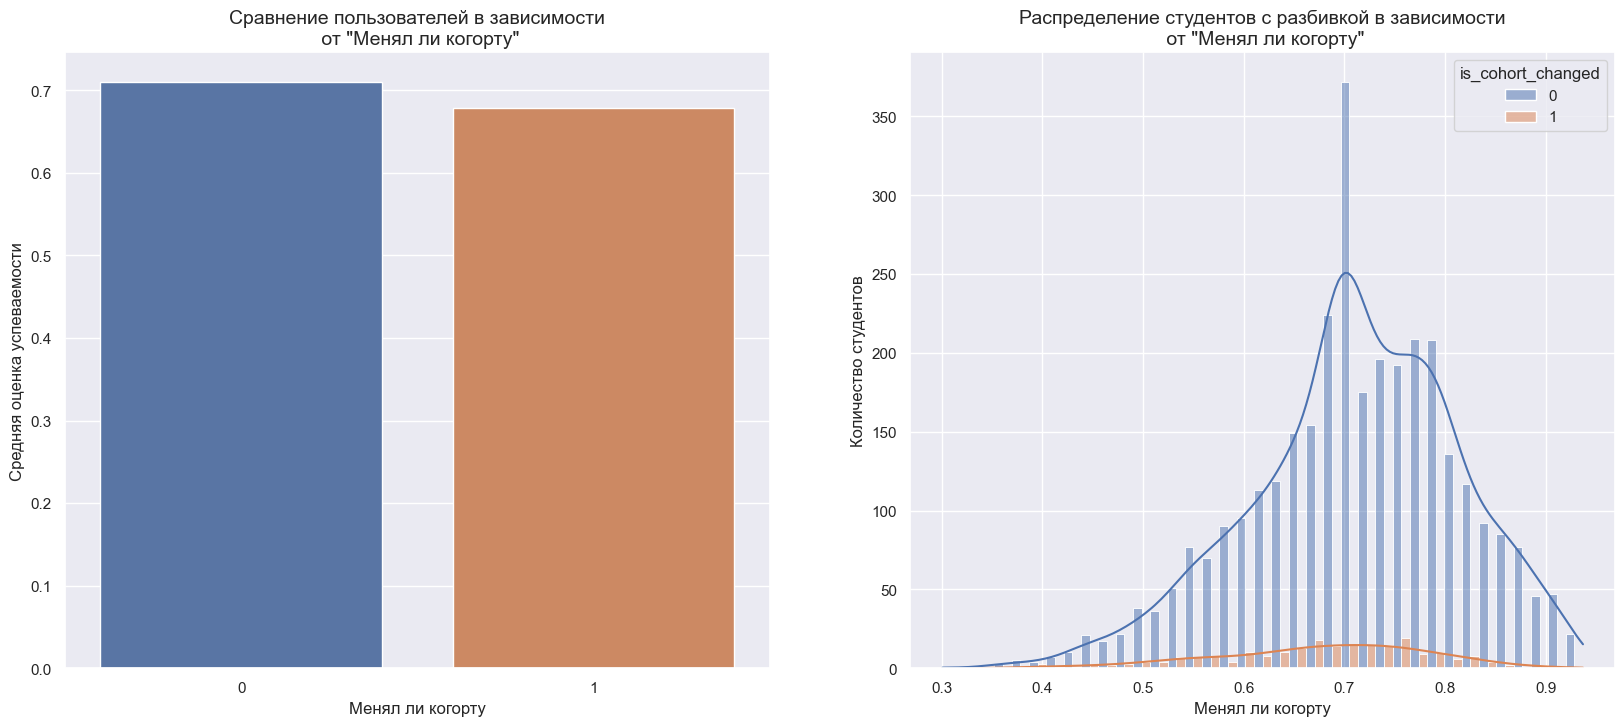

In [101]:
plots_for_hypothesis (df = final_df, 
                      main_val = 'mean_perf_evaluation', 
                      param = 'is_cohort_changed', 
                      main_val_rus_name = 'Средняя оценка успеваемости', 
                      param_rus_name = 'Менял ли когорту')

Для примера с изменением когорты мы видим, что **средняя оценка** для человека, который менял когорту **ниже**, чем для человека, который когорту не менял.

Мы видим, что когорта тех, кто менял намного меньше тех, кто не менял. Видимо меняют те, кто не справляется с темами первой когорты.

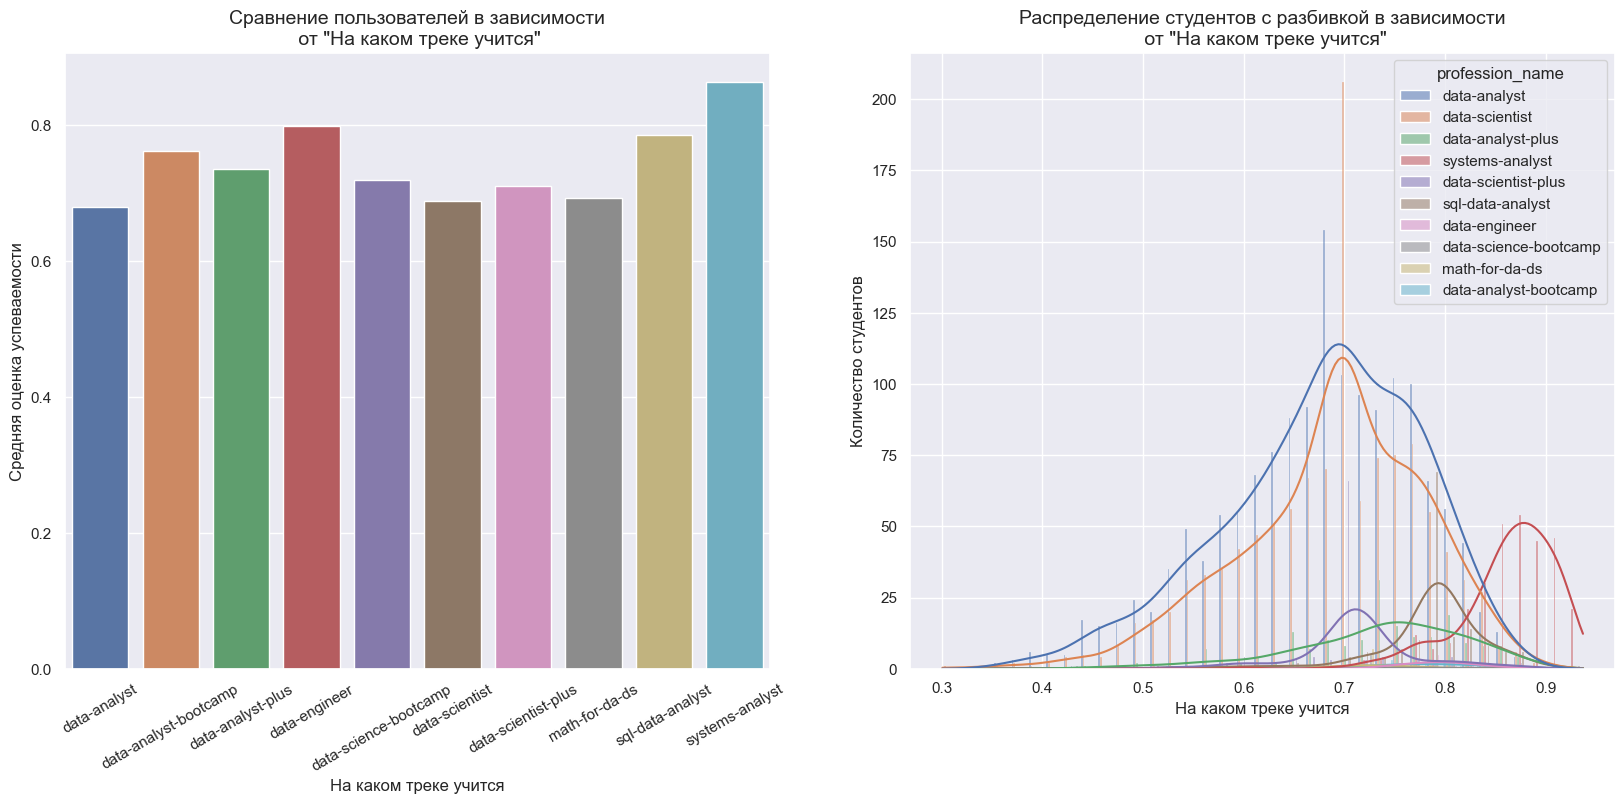

In [102]:
plots_for_hypothesis (df = final_df, 
                      main_val = 'mean_perf_evaluation', 
                      param = 'profession_name', 
                      main_val_rus_name = 'Средняя оценка успеваемости', 
                      param_rus_name = 'На каком треке учится')

Наибольшую среднюю оценку имеют пользователи из когорты системных аналитиков. А наименьшую - дата аналитики. Возможно, это связано тем, что с наибольшей когортой аналитиков.

При этом большинство аналитиков и сайентистов имеют высокую оценку - около 0.7. Но распределение среди самых высоких оценок наблюдается у системных аналитиков.

In [103]:
final_df['profession_name'].value_counts()

data-analyst             1518
data-scientist           1176
systems-analyst          310 
data-analyst-plus        187 
sql-data-analyst         154 
data-scientist-plus      110 
data-analyst-bootcamp    17  
data-engineer            14  
math-for-da-ds           10  
data-science-bootcamp    9   
Name: profession_name, dtype: int64

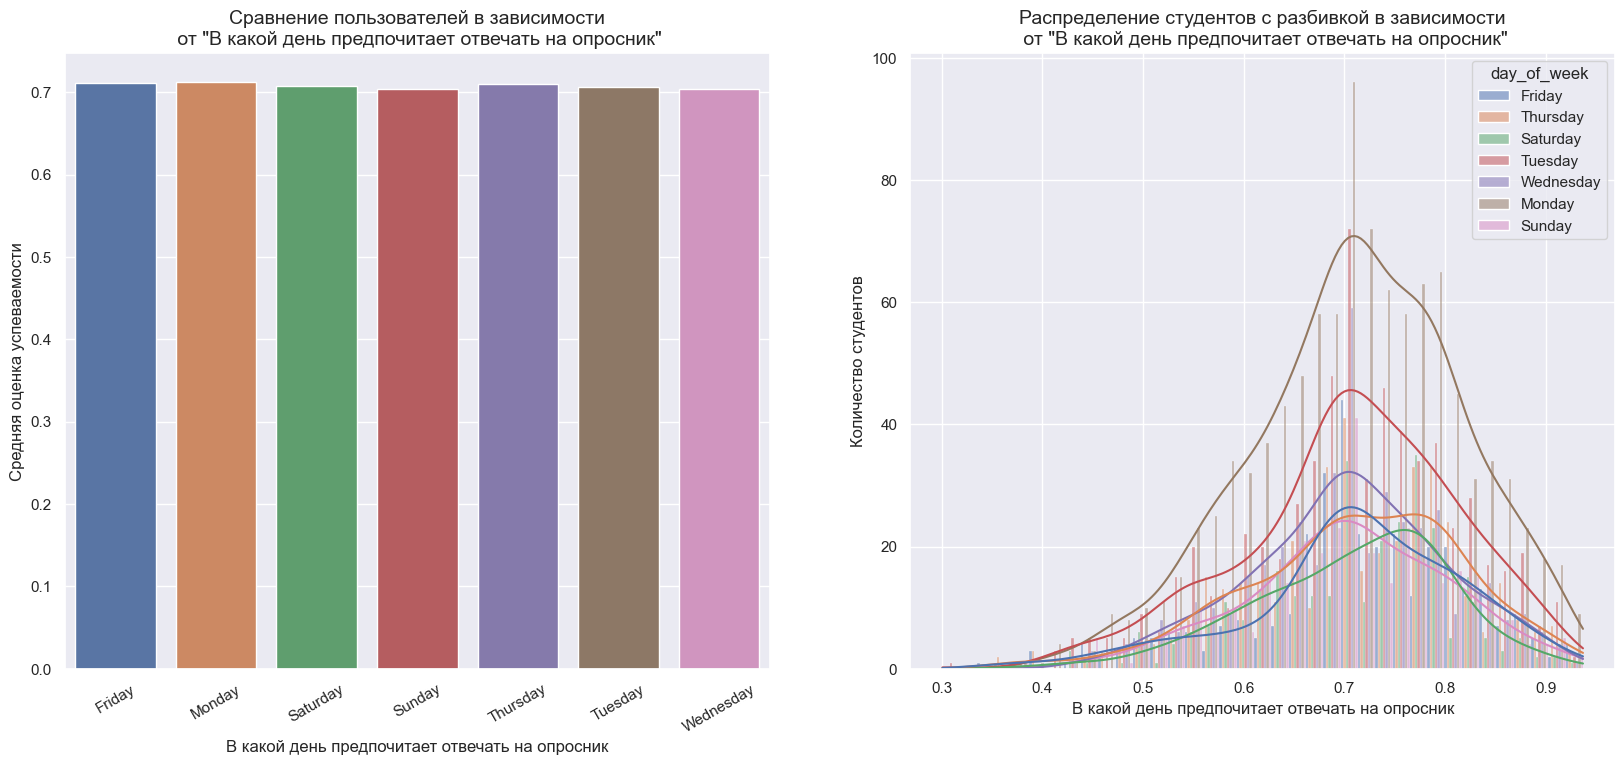

In [104]:
plots_for_hypothesis (df = final_df, 
                      main_val = 'mean_perf_evaluation', 
                      param = 'day_of_week', 
                      main_val_rus_name = 'Средняя оценка успеваемости', 
                      param_rus_name = 'В какой день предпочитает отвечать на опросник')

Среди дней недели небольшое изменение средней оценки пользователей, и наибольшая оценка у пользователей, которые проходят тесты в понедельник и четверг. Скорее всего дедлайном по данному проекту были либо воскресенье, либо среда. 


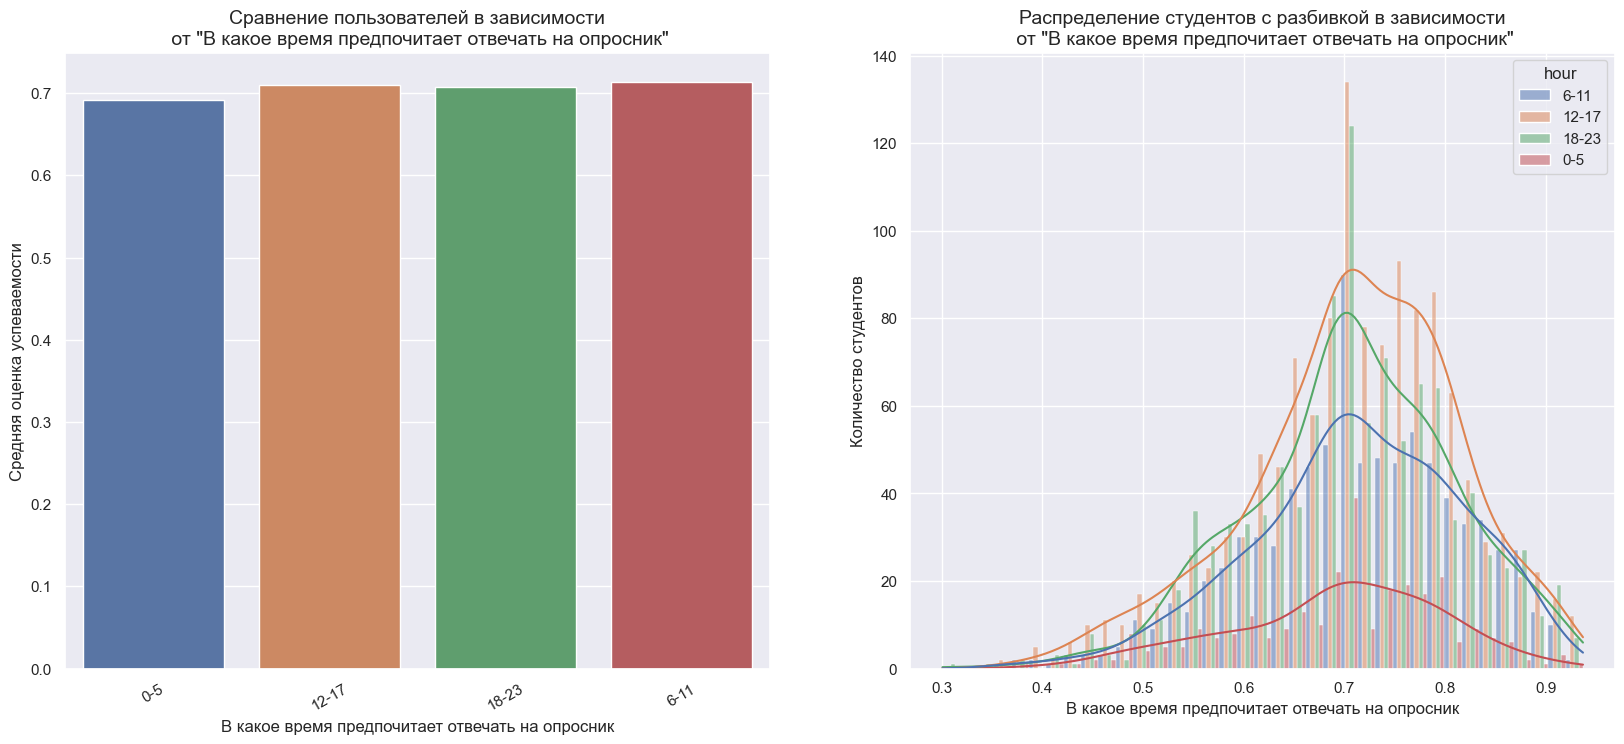

In [105]:
plots_for_hypothesis (df = final_df, 
                      main_val = 'mean_perf_evaluation', 
                      param = 'hour', 
                      main_val_rus_name = 'Средняя оценка успеваемости', 
                      param_rus_name = 'В какое время предпочитает отвечать на опросник')

Видим небольшое изменение средней оценки у пользователей, которые отвечают на вопросы в ранее утро и утро. После этого идут пользователи, которые отвечают на опросник вечером.


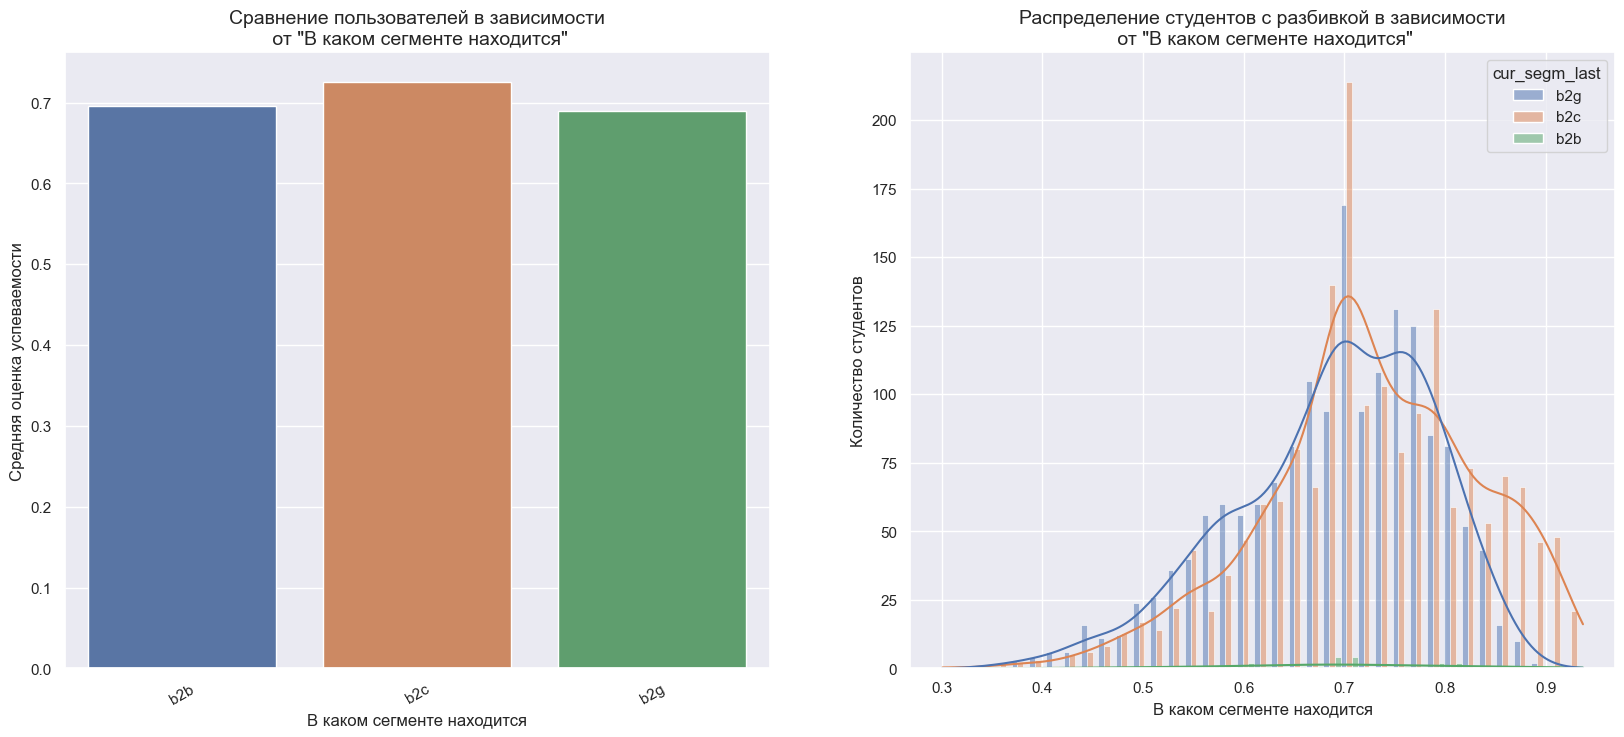

In [106]:
plots_for_hypothesis (df = final_df, 
                      main_val = 'mean_perf_evaluation', 
                      param = 'cur_segm_last', 
                      main_val_rus_name = 'Средняя оценка успеваемости', 
                      param_rus_name = 'В каком сегменте находится')

Как можно наблюдать, средняя оценка для сегмента b2c значительно выше остальных. Видимо пользователи, которые имеют личные мотивации для обучения (не мотивация от государства или бизнеса) в большей степени хотят получать хорошие оценки.

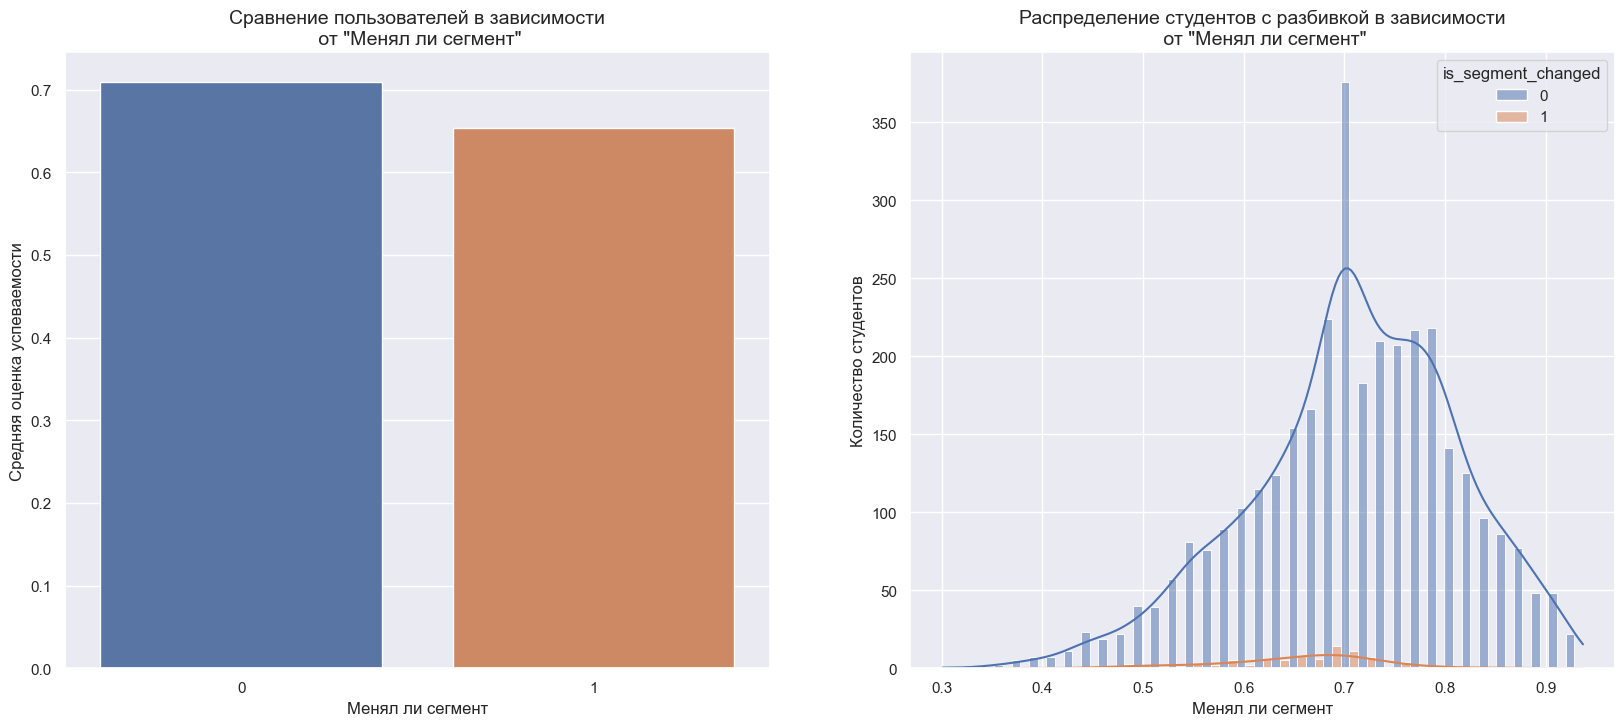

In [107]:
plots_for_hypothesis (df = final_df, 
                      main_val = 'mean_perf_evaluation', 
                      param = 'is_segment_changed', 
                      main_val_rus_name = 'Средняя оценка успеваемости', 
                      param_rus_name = 'Менял ли сегмент')

По графикам выше видно, что если пользователь менял сегмент, то его средняя оценка ниже, чем у пользователя, который сегмент не менял. Видимо смена сегмента - это последствие возможной неуспеваемости сегмента.


In [108]:
final_df.columns

Index(['user_id', 'profession_name', 'answer_id', 'mean_perf_evaluation',
       'is_perf_grow', 'mean_user_recommend_value',
       'mean_value_statement_content', 'day_of_week', 'hour', 'cur_segm_last',
       'is_segment_changed', 'is_cohort_changed',
       'над чем поработать_куда расти',
       'над чем поработать_оценка шансов на трудоустройство',
       'над чем поработать_персональная консультация',
       'над чем поработать_портфолио',
       'над чем поработать_практикум не сможет помочь',
       'над чем поработать_про повышение', 'над чем поработать_профориентация',
       'над чем поработать_резюме', 'над чем поработать_собеседования',
       'над чем поработать_сопроводительное',
       'над чем поработать_стратегия поиска работы',
       'над чем поработать_тестовые',
       'над чем поработать_устройство рынка труда',
       'нашёл работу?_В активном поиске', 'нашёл работу?_Да',
       'нашёл работу?_Нет', 'опыт_Более 3 лет опыта',
       'опыт_Менее 1 года опыта др.'

In [109]:
# В отдельные переменные сохраняем название колонок по смыслу

directions_to_raise_skills = ['над чем поработать_куда расти',
       'над чем поработать_оценка шансов на трудоустройство',
       'над чем поработать_персональная консультация',
       'над чем поработать_портфолио',
       'над чем поработать_практикум не сможет помочь',
       'над чем поработать_про повышение', 
       'над чем поработать_профориентация',
       'над чем поработать_резюме',
        'над чем поработать_собеседования',
       'над чем поработать_сопроводительное',
       'над чем поработать_стратегия поиска работы',
       'над чем поработать_тестовые',
       'над чем поработать_устройство рынка труда']
expierence = ['опыт_Нет опыта', 'опыт_Менее года в аналитике',
              'опыт_От 1 до 3 лет аналитиком?','опыт_Более 3 лет опыта',
        'опыт_От 1 года опыта др.','опыт_Менее 1 года опыта др.']
plans_for_track = ['планы на трек_да, план',
       'планы на трек_да, уже', 'планы на трек_нет']
goals = ['цель_Сменить работу.',
       'цель_бизнес', 'цель_карьера', 'цель_нет цели',
       'цель_новые знания - общее развитие', 'цель_новые знания - рост ЗП',
       'цель_структурировать знания']
find_job = ['нашёл работу?_В активном поиске', 'нашёл работу?_Да',
       'нашёл работу?_Нет']
user_metrics = ['profession_name', 'mean_perf_evaluation',
       'is_perf_grow', 'mean_user_recommend_value',
       'mean_value_statement_content', 'day_of_week', 'hour', 'cur_segm_last',
       'is_segment_changed', 'is_cohort_changed']

# В отдельные переменные сохраняем название колонок по типу переменных внутри
binary_metrics = directions_to_raise_skills+expierence+plans_for_track+goals+find_job+['is_perf_grow', 'is_segment_changed', 'is_cohort_changed']
category_metrics = ['profession_name',  'day_of_week', 'hour', 'cur_segm_last']
values_metrics = ['mean_perf_evaluation', 'mean_user_recommend_value', 'mean_value_statement_content']

In [110]:
# Строим графики для всех числовых метрик
#for direction in directions_to_raise_skills:
#  for metric in expierence+plans_for_track+goals+find_job+['is_perf_grow', 'is_segment_changed', 'is_cohort_changed']+values_metrics:
#              plots_for_hypothesis (df = final_df, 
#                      main_val = metric, 
#                      param = direction, 
#                      main_val_rus_name = '{}'.format(metric), 
#                      param_rus_name = '{}'.format(direction))

## Гипотезы по улучшению выстраивания помощи студентам


---


**Гипотезы по тому, что хочется улучшить**

**Гипотеза - 6**

Пользователи, которые считают, что им надо понять, как говорить про повышение, имеют такую же успеваемость, как и те, кто такую потребность не имеют

**Гипотеза - 7**

Пользователи, которые считают, что им надо понять, как и куда расти, имеют такую же успеваемость, как и те, кто такую потребность не имеют

**Гипотеза - 8**

Пользователи, которые считают, что им практикум не сможет помочь при трудоустройстве, имеют такую же успеваемость, как и те, кто так не считает

**Гипотеза - 9**

Пользователи, которые считают, что им надо понять свою профессиональную сферу, имеют такую же успеваемость, как и те, кто так не считает

**Гипотеза - 10**

Пользователи, которые считают, что им надо понять свою стратегию поиска работы, имеют такую же успеваемость, как и те, кто так не считает

**Гипотеза - 11**

Пользователи, которые считают, что им надо оформить портфолио, имеют такую же успеваемость, как и те, кто так не считает

**Гипотеза - 12**

Пользователи, которые считают, что им надо оценить шансы на трудоустройство, имеют такую же успеваемость, как и те, кто так не считает

**Гипотеза - 13**

Пользователи, которые считают, что им нужна персональная карьерная консультация, имеют такую же успеваемость, как и те, кто так не считает

**Гипотеза - 14**

Пользователи, которые считают, что им нужна помощь в прохождении собеседований, имеют такую же успеваемость, как и те, кто так не считает

**Гипотеза - 15**

Пользователи, которые считают, что им нужно резюме, имеют такую же успеваемость, как и те, кто так не считает

**Гипотеза - 16**

Пользователи, которые считают, что им нужно решение тестовых задач, имеют такую же успеваемость, как и те, кто так не считает

**Гипотеза - 17**

Пользователи, которые считают, что им нужно сопроводительное письмо, имеют такую же успеваемость, как и те, кто так не считает

**Гипотеза - 18**

Пользователи, которые считают, что им нужно узнать устройство рынка труда, имеют такую же успеваемость, как и те, кто так не считает

**Гипотезы по поиску работы**

**Гипотеза - 19**

Пользователи, которые находятся в активном поиске работы в течение обучения, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотеза - 20**

Пользователи, которые нашли работу в течение обучения, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотеза - 21**

Пользователи, которые не нашли работу в течение обучения, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотезы по опыту работы**

**Гипотеза - 22**

Пользователи, которые имеют более 3 лет опыта работы, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотеза - 23**

Пользователи, которые имеют менее 1 года опыта работы не в сфере IT, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотеза - 24**

Пользователи, которые имеют менее 1 года опыта работы в аналитике, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотеза - 25**

Пользователи, которые имеют менее 1 года опыта работы в аналитике, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотеза - 26**

Пользователи, которые имеют не имеют опыта работы, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотеза - 27**

Пользователи, которые имеют более 1 года опыта работы не в сфере IT, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотеза - 28**

Пользователи, которые имеют от 1 года до 3 лет опыта работы в аналитике, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотеза - 29**

Пользователи, которые имеют от 1 года до 3 лет опыта работы в аналитике, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотезы по карьерному треку**

**Гипотеза - 30**

Пользователи, которые планируют записаться на карьерный трек после диплома, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотеза - 31**

Пользователи, которые в течение обучения уже записались на карьерный трек, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотеза - 32**

Пользователи, которые не планируют записаться на карьерный трек, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотеза - 33**

Пользователи, которые не планируют записаться на карьерный трек, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотезы по цели обучения**

**Гипотеза - 34**

Пользователи, которые не имеют какую-то конкретную цель обучения, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотеза - 35**

Пользователи, которые хотят получить новые знания, чтобы повысить зарплату, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотеза - 36**

Пользователи, которые хотят получить новые навыки для общего развития, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотеза - 37**

Пользователи, которые хотят продвинуться по карьерной лестнице, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотеза - 38**

Пользователи, которые хотят развить свой бизнес, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотеза - 39**

Пользователи, которые хотят сменить работу, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотеза - 40**

Пользователи, которые хотят структурировать уже полученные навыки, имеют такую же успеваемость, как и те, кто выбрал другой вариант

**Гипотеза - 41**

Пользователи, которые хотят структурировать уже полученные навыки, имеют такую же успеваемость, как и те, кто выбрал другой вариант


**Гипотезы по тому, что хочется улучшить**

**Гипотеза - 42**

Пользователи, которые считают, что им надо понять, как говорить про повышение, имеют такую же уверенность в своих знаниях, как и те, кто такую потребность не имеют

**Гипотеза - 43**

Пользователи, которые считают, что им надо понять, как и куда расти, имеют такую же уверенность в своих знаниях, как и те, кто такую потребность не имеют

**Гипотеза - 44**

Пользователи, которые считают, что им практикум не сможет помочь при трудоустройстве, имеют такую же уверенность в своих знаниях, как и те, кто так не считает

**Гипотеза - 45**

Пользователи, которые считают, что им надо понять свою профессиональную сферу, имеют такую же уверенность в своих знаниях, как и те, кто так не считает

**Гипотеза - 46**

Пользователи, которые считают, что им надо понять свою стратегию поиска работы, имеют такую же уверенность в своих знаниях, как и те, кто так не считает

**Гипотеза - 47**

Пользователи, которые считают, что им надо оформить портфолио, имеют такую же уверенность в своих знаниях, как и те, кто так не считает

**Гипотеза - 48**

Пользователи, которые считают, что им надо оценить шансы на трудоустройство, имеют такую же уверенность в своих знаниях, как и те, кто так не считает

**Гипотеза - 49**

Пользователи, которые считают, что им нужна персональная карьерная консультация, имеют такую же уверенность в своих знаниях, как и те, кто так не считает

**Гипотеза - 50**

Пользователи, которые считают, что им нужна помощь в прохождении собеседований, имеют такую же уверенность в своих знаниях, как и те, кто так не считает

**Гипотеза - 51**

Пользователи, которые считают, что им нужно резюме, имеют такую же уверенность в своих знаниях, как и те, кто так не считает

**Гипотеза - 52**

Пользователи, которые считают, что им нужно решение тестовых задач, имеют такую же уверенность в своих знаниях, как и те, кто так не считает

**Гипотеза - 53**

Пользователи, которые считают, что им нужно сопроводительное письмо, имеют такую же уверенность в своих знаниях, как и те, кто так не считает

**Гипотеза - 54**

Пользователи, которые считают, что им нужно узнать устройство рынка труда, имеют такую же уверенность в своих знаниях, как и те, кто так не считает

**Гипотезы по поиску работы**

**Гипотеза - 55**

Пользователи, которые находятся в активном поиске работы в течение обучения, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотеза - 56**

Пользователи, которые нашли работу в течение обучения, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотеза - 57**

Пользователи, которые не нашли работу в течение обучения, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотезы по опыту работы**

**Гипотеза - 58**

Пользователи, которые имеют более 3 лет опыта работы, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотеза - 59**

Пользователи, которые имеют менее 1 года опыта работы не в сфере IT, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотеза - 60**

Пользователи, которые имеют менее 1 года опыта работы в аналитике, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотеза - 61**

Пользователи, которые имеют менее 1 года опыта работы в аналитике, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотеза - 62**

Пользователи, которые имеют не имеют опыта работы, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотеза - 63**

Пользователи, которые имеют более 1 года опыта работы не в сфере IT, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотеза - 64**

Пользователи, которые имеют от 1 года до 3 лет опыта работы в аналитике, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотеза - 65**

Пользователи, которые имеют от 1 года до 3 лет опыта работы в аналитике, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотезы по карьерному треку**

**Гипотеза - 66**

Пользователи, которые планируют записаться на карьерный трек после диплома, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотеза - 67**

Пользователи, которые в течение обучения уже записались на карьерный трек, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотеза - 68**

Пользователи, которые не планируют записаться на карьерный трек, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотеза - 69**

Пользователи, которые не планируют записаться на карьерный трек, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотезы по цели обучения**

**Гипотеза - 70**

Пользователи, которые не имеют какую-то конкретную цель обучения, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотеза - 71**

Пользователи, которые хотят получить новые знания, чтобы повысить зарплату, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотеза - 72**

Пользователи, которые хотят получить новые навыки для общего развития, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотеза - 73**

Пользователи, которые хотят продвинуться по карьерной лестнице, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотеза - 74**

Пользователи, которые хотят развить свой бизнес, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотеза - 75**

Пользователи, которые хотят сменить работу, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотеза - 76**

Пользователи, которые хотят структурировать уже полученные навыки, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант

**Гипотеза - 77**

Пользователи, которые хотят структурировать уже полученные навыки, имеют такую же уверенность в своих знаниях, как и те, кто выбрал другой вариант


**Гипотезы по тому, что хочется улучшить**

**Гипотеза - 78**

Пользователи, которые считают, что им надо понять, как говорить про повышение, имеют такую же вероятность рекомендации Практикума, как и те, кто такую потребность не имеют

**Гипотеза - 79**

Пользователи, которые считают, что им надо понять, как и куда расти, имеют такую же вероятность рекомендации Практикума, как и те, кто такую потребность не имеют

**Гипотеза - 80**

Пользователи, которые считают, что им практикум не сможет помочь при трудоустройстве, имеют такую же вероятность рекомендации Практикума, как и те, кто так не считает

**Гипотеза - 81**

Пользователи, которые считают, что им надо понять свою профессиональную сферу, имеют такую же вероятность рекомендации Практикума, как и те, кто так не считает

**Гипотеза - 82**

Пользователи, которые считают, что им надо понять свою стратегию поиска работы, имеют такую же вероятность рекомендации Практикума, как и те, кто так не считает

**Гипотеза - 83**

Пользователи, которые считают, что им надо оформить портфолио, имеют такую же вероятность рекомендации Практикума, как и те, кто так не считает

**Гипотеза - 84**

Пользователи, которые считают, что им надо оценить шансы на трудоустройство, имеют такую же вероятность рекомендации Практикума, как и те, кто так не считает

**Гипотеза - 85**

Пользователи, которые считают, что им нужна персональная карьерная консультация, имеют такую же вероятность рекомендации Практикума, как и те, кто так не считает

**Гипотеза - 86**

Пользователи, которые считают, что им нужна помощь в прохождении собеседований, имеют такую же вероятность рекомендации Практикума, как и те, кто так не считает

**Гипотеза - 87**

Пользователи, которые считают, что им нужно резюме, имеют такую же вероятность рекомендации Практикума, как и те, кто так не считает

**Гипотеза - 88**

Пользователи, которые считают, что им нужно решение тестовых задач, имеют такую же вероятность рекомендации Практикума, как и те, кто так не считает

**Гипотеза - 89**

Пользователи, которые считают, что им нужно сопроводительное письмо, имеют такую же вероятность рекомендации Практикума, как и те, кто так не считает

**Гипотеза - 90**

Пользователи, которые считают, что им нужно узнать устройство рынка труда, имеют такую же вероятность рекомендации Практикума, как и те, кто так не считает

**Гипотезы по поиску работы**

**Гипотеза - 91**

Пользователи, которые находятся в активном поиске работы в течение обучения, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотеза - 92**

Пользователи, которые нашли работу в течение обучения, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотеза - 93**

Пользователи, которые не нашли работу в течение обучения, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотезы по опыту работы**

**Гипотеза - 94**

Пользователи, которые имеют более 3 лет опыта работы, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотеза - 95**

Пользователи, которые имеют менее 1 года опыта работы не в сфере IT, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотеза - 96**

Пользователи, которые имеют менее 1 года опыта работы в аналитике, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотеза - 97**

Пользователи, которые имеют менее 1 года опыта работы в аналитике, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотеза - 98**

Пользователи, которые имеют не имеют опыта работы, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотеза - 99**

Пользователи, которые имеют более 1 года опыта работы не в сфере IT, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотеза - 100**

Пользователи, которые имеют от 1 года до 3 лет опыта работы в аналитике, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотеза - 101**

Пользователи, которые имеют от 1 года до 3 лет опыта работы в аналитике, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотезы по карьерному треку**

**Гипотеза - 102**

Пользователи, которые планируют записаться на карьерный трек после диплома, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотеза - 103**

Пользователи, которые в течение обучения уже записались на карьерный трек, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотеза - 104**

Пользователи, которые не планируют записаться на карьерный трек, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотеза - 105**

Пользователи, которые не планируют записаться на карьерный трек, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотезы по цели обучения**

**Гипотеза - 106**

Пользователи, которые не имеют какую-то конкретную цель обучения, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотеза - 107**

Пользователи, которые хотят получить новые знания, чтобы повысить зарплату, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотеза - 108**

Пользователи, которые хотят получить новые навыки для общего развития, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотеза - 109**

Пользователи, которые хотят продвинуться по карьерной лестнице, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотеза - 110**

Пользователи, которые хотят развить свой бизнес, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотеза - 111**

Пользователи, которые хотят сменить работу, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотеза - 112**

Пользователи, которые хотят структурировать уже полученные навыки, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант

**Гипотеза - 113**

Пользователи, которые хотят структурировать уже полученные навыки, имеют такую же вероятность рекомендации Практикума, как и те, кто выбрал другой вариант


In [111]:
# Функция для отрисовки категориальных переменных
def categorical_plots(df, x_vals, col, hue):
    for x in x_vals:
        for c in col:
            for h in hue:
                sns.displot(df, 
                        x=x,
                        hue=h, 
                        col=c, 
                        multiple="dodge").set_xticklabels(rotation=30)

In [ ]:
#Строим графики
categorical_plots(df=final_df, x_vals=category_metrics, col=goals, hue=directions_to_raise_skills)

In [ ]:
# Хитмэпы зависимости часов на вопросы о целях
for goal in goals:
    temp_df=final_df[final_df[goal]==1]  
    sns.heatmap(temp_df.pivot_table(index = 'hour', 
                                values = 'user_id', 
                                columns = 'is_perf_grow',
                                aggfunc = 'count')).set_title('Хитмеп ответов пользователей на вопрос {}'.format(goal), 
                                                              fontsize=12)
    
    plt.show()

Среди графиков выделяются следующие пересечения:

* Чем больше опыт работы студента, тем более он склонен к тому, что практикум ему не поможет, а чем больше - тем больше веротяность, что поможет

* Чем меньше опыт работы, тем более его интересуют "артефакты", а чем больше - тем больше интересуют возможности роста как специалисту


Ключевые гипотезы:
Гипотеза 1 - пользователи с большим опытом работы (аналитики  и другие) от 1 года более склоны выбирать над чем поработать - куда расти (разница 1,5)

Гипотеза 2 - пользователи с целью сменить работы более склоны выбирать над чем поработать - куда расти (разница 1)

Гипотеза 3 - пользователи, у которых нет опыта, больше хотят оценить шансы на трудоустройство (разница 1)

Гипотеза 4 - пользователи, которые планируют карьерный трек, больше хотят оценить шансы на трудоустройство (разница 1)

Гипотеза 5 - пользователи, у которых нет опыта, больше хотят персональну/ консультацию (разница 1)

Гипотеза 6 - пользователи, у которых нет опыта, больше хотят проработать портфолио (разница 1)

Гипотеза 7 - пользователи, у которых менее 1 года опыта другого опыта, меньше хотят проработать портфолио (разница между в 2 раза)

Гипотеза 8 - пользователи, у которых нет планов на карьерный трек, меньше хотят  проработать портфолио (разница между более чем в 2 раза)

Гипотеза 9 - пользователи, которые хотят структурировать знания, меньше хотят  проработать портфолио (разница между более чем в 2 раза)

Гипотеза 9 - пользователи, которые хотят структурировать знания, меньше хотят  проработать портфолио (разница между более чем в 2 раза)

Гипотеза 10 - пользователи, у которых нет опыта, меньше выбирают пункт, что практикум им не поможет (разница между более чем в 2 раза)

Гипотеза 11 - пользователи, у которых опыт работы аналитиком от 1 до 3 лет, больше выбирают пункт, что практикум им не поможет (разница между в 2 раза)

Гипотеза 12
Про повышение говорят в основном те, кто имеет опыт работы

Гипотеза 13 
Про повышения говорят в основном те, кто планов на карьерный трек не имеет

Гипотеза 14
Про повышения говорят в основном те, кто хочет сменить работу

Гипотеза 15
Меньше говорят про повышения, если хотят открыть бизнес

Гипотеза 16
Больше говорят про повышения, если хотят рост ЗП

Гипотеза 17
Больше говорят про повышения, если хотят структурировать знания

Гипотеза 18 
Больше говорят про повышения, если нашел работу в течение обучения

Гипотеза 19
Больше говорят про повышения, если сменили сегмент обучения

Гипотеза 20
Меньше хотят поработать с собеседованиями, если хотят открыть бизнес

Гипотеза 21
Меньше хотят поработать с собеседованиями, если нет цели

Гипотеза 22
Меньше хотят поработать с собеседованиями, если хотят роста ЗП

Гипотеза 23
Не хотят вообще работать с собеседованиями, если хотят бизнес

## Итоговые выводы


---


Должен быть разный подход к построению работы с группами студентов на карьерном треке.
<br>
<br>
**Группа новички**, которые ищут работу активно - нужна помощь с оформлением артефактов, предоставление шаблонов резюме, сопроводительного письма, портфолио, и может быть ДЗ типа "запиши видеопрезентацию "Расскажите о себе". Проведение "тестовых собеседований"
<br>
<br>
**Группа профессионалы**, которые улучшить навыки - нужен коучинговый подход, работа в индивидуальном формате, персональная оценка навыков, может какое-то тестирование, составление плана развития.